In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install matplotlib -U
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 25.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (14.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and direc

In [ ]:
import matplotlib.pyplot as plt # 다운 받은 글꼴 plt에 적용
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 데이터 scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
# !pip install --upgrade seaborn

In [ ]:
sns.__version__

'0.12.2'

# 데이터 현황

> 데이터 드랍
>> plate_no
- 변수는 실질적 인덱스와 같기 때문에 drop

>> rolling_date
- 변수 또한 시간적으로 오류가 발생한 것은 사실상 기계오류 이므로 특정 시간에 불량이 많았다고 볼 수 있는 근거가 없었음으로 drop

>> spec_long
- 변수는 검정 부분에서 어느정도 유의성을 띄긴 했으나 변수의 카테고리가 많아서 공통된 특징끼리 묶어 카테고리를 줄여서 사용하려 했으나 온도와 관련된 변수들의 중요성이 강조되어 변수의 차원의 저주를 고려하여 drop

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DA_project/데이터분석(스크립트)/2. Big Data 분석/SCALE불량.csv', encoding = 'euc-kr')

In [ ]:
dftest = df.drop(['plate_no','rolling_date'], axis= 1)

In [ ]:
dftest = dftest[(df['fur_heat_temp'] >= 1160) & (df['fur_heat_temp'] <= 1180)][df['scale'] == '불량']

<ipython-input-215-c03508d76209>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dftest = dftest[(df['fur_heat_temp'] >= 1160) & (df['fur_heat_temp'] <= 1180)][df['scale'] == '불량']


In [ ]:
dftest[df['scale'] == '불량']['spec_long'].value_counts()

<ipython-input-217-f2a84a47cbdc>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dftest[df['scale'] == '불량']['spec_long'].value_counts()


JS-SM490YB    19
JS-SM490A     14
KR-A          12
LR-A          10
JS-SS400       8
BV-B           8
SA283-C        6
A283-C         5
LR-B           5
LR-AH32        5
GL-A           4
BV-AH32        4
AB/AH32        4
JS-SM490YA     3
JS-SM400B      3
BV-A           2
AB/A           2
NV-A           2
NV-A32         2
KR-AH32        2
KS-SM400B      1
NK-KA32        1
KS-SS400       1
KS-SM490A      1
KS-SM400A      1
KS-SM490B      1
NV-D36-TM      1
A516-60        1
GL-D36-TM      1
COMMON         1
NV-A32-TM      1
LR-EH32-TM     1
GL-A32-TM      1
AB/B           1
V42JBN3        1
NK-KA          1
Name: spec_long, dtype: int64

In [ ]:
df = df.drop(['plate_no','rolling_date','spec_long'], axis= 1)

In [ ]:
df

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,양품,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,양품,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,양품,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,양품,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,양품,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,양품,프랑스,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
996,양품,영국,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
997,양품,미국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
998,양품,영국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


# 데이터 정제

## 결측치 확인

In [ ]:
df.isnull().sum()

scale              0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
fur_ex_temp        0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scale            1000 non-null   object
 1   spec_country     1000 non-null   object
 2   steel_kind       1000 non-null   object
 3   pt_thick         1000 non-null   int64 
 4   pt_width         1000 non-null   int64 
 5   pt_length        1000 non-null   int64 
 6   hsb              1000 non-null   object
 7   fur_no           1000 non-null   object
 8   fur_input_row    1000 non-null   object
 9   fur_heat_temp    1000 non-null   int64 
 10  fur_heat_time    1000 non-null   int64 
 11  fur_soak_temp    1000 non-null   int64 
 12  fur_soak_time    1000 non-null   int64 
 13  fur_total_time   1000 non-null   int64 
 14  fur_ex_temp      1000 non-null   int64 
 15  rolling_method   1000 non-null   object
 16  rolling_temp     1000 non-null   int64 
 17  descaling_count  1000 non-null   i

>

## 범주형 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scale            1000 non-null   object
 1   spec_country     1000 non-null   object
 2   steel_kind       1000 non-null   object
 3   pt_thick         1000 non-null   int64 
 4   pt_width         1000 non-null   int64 
 5   pt_length        1000 non-null   int64 
 6   hsb              1000 non-null   object
 7   fur_no           1000 non-null   object
 8   fur_input_row    1000 non-null   object
 9   fur_heat_temp    1000 non-null   int64 
 10  fur_heat_time    1000 non-null   int64 
 11  fur_soak_temp    1000 non-null   int64 
 12  fur_soak_time    1000 non-null   int64 
 13  fur_total_time   1000 non-null   int64 
 14  fur_ex_temp      1000 non-null   int64 
 15  rolling_method   1000 non-null   object
 16  rolling_temp     1000 non-null   int64 
 17  descaling_count  1000 non-null   i

> scale

In [ ]:
scal = pd.DataFrame(df['scale'].value_counts()/df['scale'].count())
scal.reset_index(inplace = True)
scal

,index,scale
0,양품,0.69
1,불량,0.31


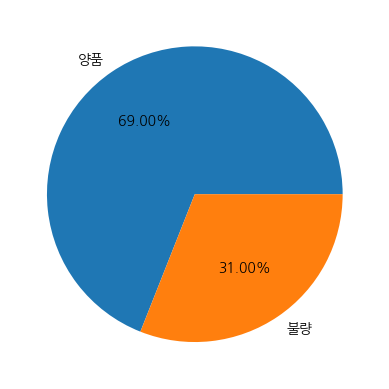

In [ ]:
plt.pie(x = list(scal['scale']), labels = list(scal['index']), autopct='%.2f%%')
plt.show()

- 양품과 불량의 비율이 7:3으로 불량률이 상당히 높은 것으로 나왔다

> spec_country

In [ ]:
spec = pd.DataFrame(df['spec_country'].value_counts()/df['spec_country'].count())
spec.reset_index(inplace = True)
spec

,index,spec_country
0,영국,0.256
1,일본,0.187
2,미국,0.159
3,프랑스,0.143
4,한국,0.132
5,독일,0.087
6,공통,0.036


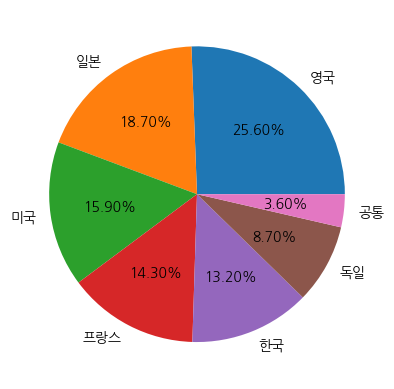

In [ ]:
plt.pie(x = list(spec['spec_country']), labels = list(spec['index']), autopct='%.2f%%')
plt.show()

- 영국, 일본, 미국, 프랑스 순으로 생산량이 높은 것을 볼 수 있다

> steel_kind

In [ ]:
steel = pd.DataFrame(df['steel_kind'].value_counts()/df['steel_kind'].count())
steel.reset_index(inplace = True)
steel

,index,steel_kind
0,C,0.755
1,T,0.245


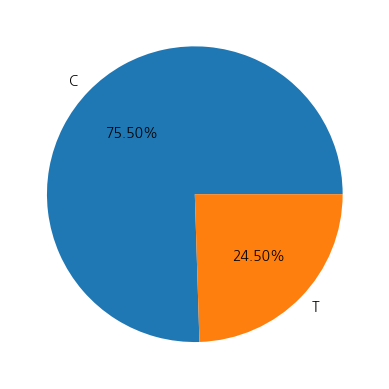

In [ ]:
plt.pie(x = list(steel['steel_kind']), labels = list(steel['index']), autopct='%.2f%%')
plt.show()

- 강종별 티타늄과 탄소로 나뉘어지며, 각각 영향이 큰 변수인 온도관련 변수의 기준치가 다르기에 강종별 데이터를 나누어 각자 분석을 하려 했으나 티타늄의 데이터가 24%로 적은 데이터를 가지고 분석을 하기 어려워 전체 데이터를 사용하여 분석하는 방향 채택

> hsb

In [ ]:
hs = pd.DataFrame(df['hsb'].value_counts()/df['hsb'].count())
hs.reset_index(inplace = True)
hs

,index,hsb
0,적용,0.953
1,미적용,0.047


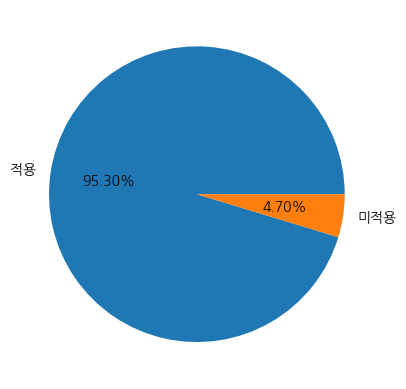

In [ ]:
plt.pie(x = list(hs['hsb']), labels = list(hs['index']), autopct='%.2f%%')
plt.show()

- hsb 과정에서 미적용한 경우의 비율이 굉장히 적기 때문에 양품의 큰 기준이 될 것이라고 판단

> fur_no

In [ ]:
fn = pd.DataFrame(df['fur_no'].value_counts()/df['fur_no'].count())
fn.reset_index(inplace = True)
fn

,index,fur_no
0,3호기,0.342
1,1호기,0.333
2,2호기,0.325


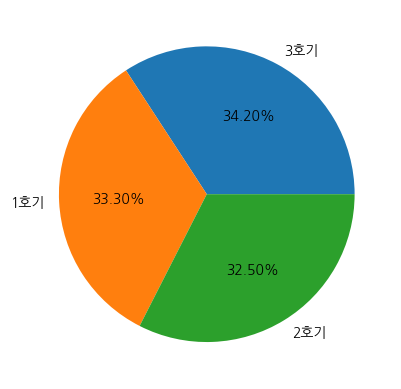

In [ ]:
plt.pie(x = list(fn['fur_no']), labels = list(fn['index']), autopct='%.2f%%')
plt.show()

> fur_input_row

In [ ]:
fir = pd.DataFrame(df['fur_input_row'].value_counts()/df['fur_input_row'].count())
fir.reset_index(inplace = True)
fir

,index,fur_input_row
0,1열,0.508
1,2열,0.492


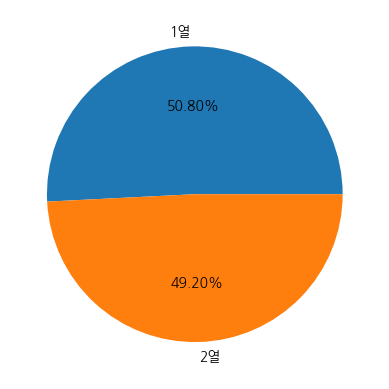

In [ ]:
plt.pie(x = list(fir['fur_input_row']), labels = list(fir['index']), autopct='%.2f%%')
plt.show()

> rolling_method

In [ ]:
rm = pd.DataFrame(df['rolling_method'].value_counts()/df['rolling_method'].count())
rm.reset_index(inplace = True)
rm

,index,rolling_method
0,CR(제어압연),0.84
1,TMCP(온도제어),0.16


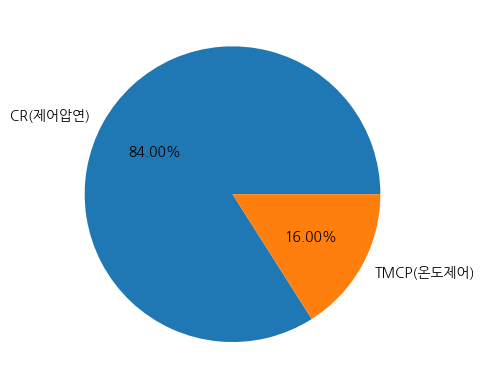

In [ ]:
plt.pie(x = list(rm['rolling_method']), labels = list(rm['index']), autopct='%.2f%%')
plt.show()

> work_group

In [ ]:
wg = pd.DataFrame(df['work_group'].value_counts()/df['work_group'].count())
wg.reset_index(inplace = True)
wg

,index,work_group
0,2조,0.292
1,1조,0.280
2,3조,0.218
3,4조,0.210


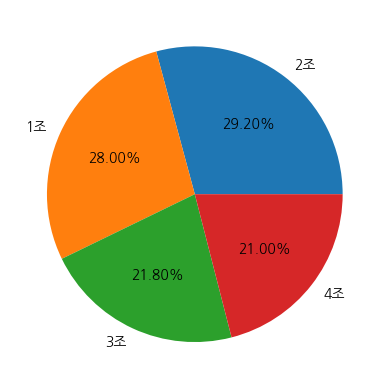

In [ ]:
plt.pie(x = list(wg['work_group']), labels = list(wg['index']), autopct='%.2f%%')
plt.show()

## 연속형 이상치

> pt_thick
- 후판 기준 6mm~ 100mm 사이
- 위 후판 두께는 정상 기준치

Text(0.5, 1.0, 'hist')

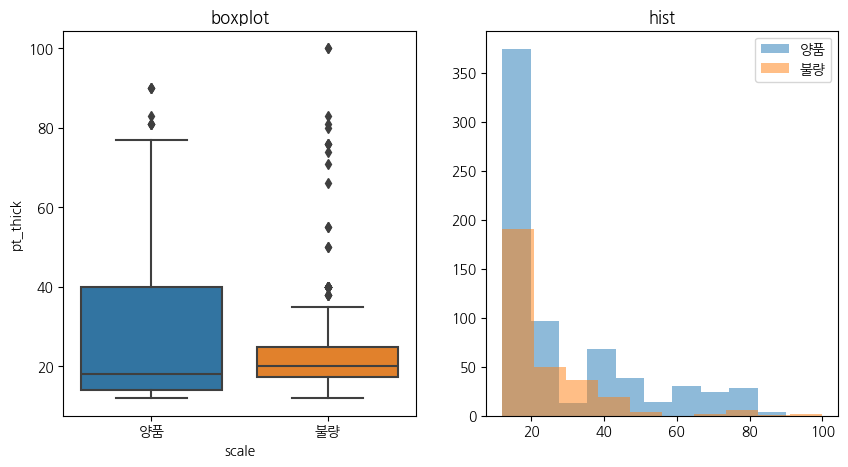

In [ ]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'pt_thick', data = df)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df[df['scale'] == '양품']['pt_thick'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['pt_thick'], label = '불량', alpha = 0.5)
plt.legend()
plt.title('hist')

In [ ]:
df[(df['scale'] == '불량') & (df['pt_thick'] >90 )]

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
859,불량,일본,C,100,2300,9500,적용,3호기,2열,1144,85,1150,52,219,1150,CR(제어압연),1050,6,3조
860,불량,일본,C,100,2300,9500,적용,1호기,1열,1130,78,1137,61,206,1137,CR(제어압연),1037,6,3조


In [ ]:
df = df[df['pt_thick'] <100]

Text(0.5, 1.0, 'hist')

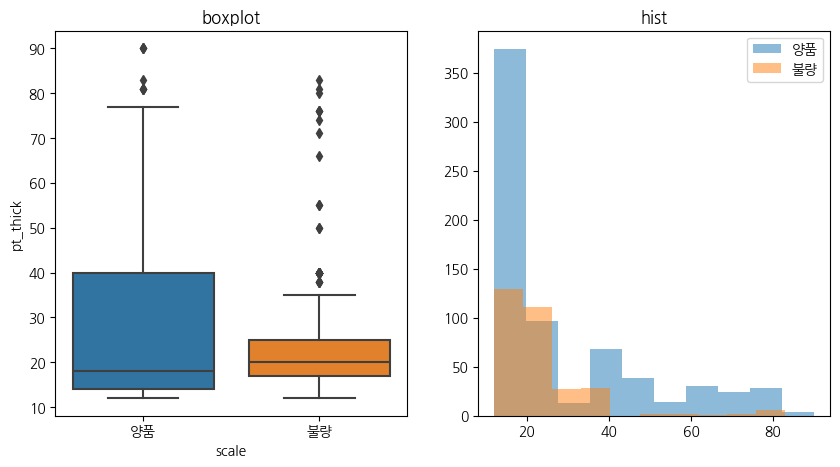

In [ ]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'pt_thick', data = df)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df[df['scale'] == '양품']['pt_thick'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['pt_thick'], label = '불량', alpha = 0.5)
plt.legend()
plt.title('hist')

- 후판 두께를 나타내는 변수인 pt_thick에서 실제 후판 두께의 정상기준치는 6mm~100mm이기 때문에 이상치로 보이는 값은 100mm이상으로 극후판으로 분류가 되므로 이상치로 판단

> pt_width
- 1500mm ~ 5300mm 너비 기준치
- 모든 값이 너비의 기준치에 부합하므로 양품/불량 모두 이상치라고 판단할만한 값은 없는 것으로 판단

Text(0.5, 1.0, 'hist')

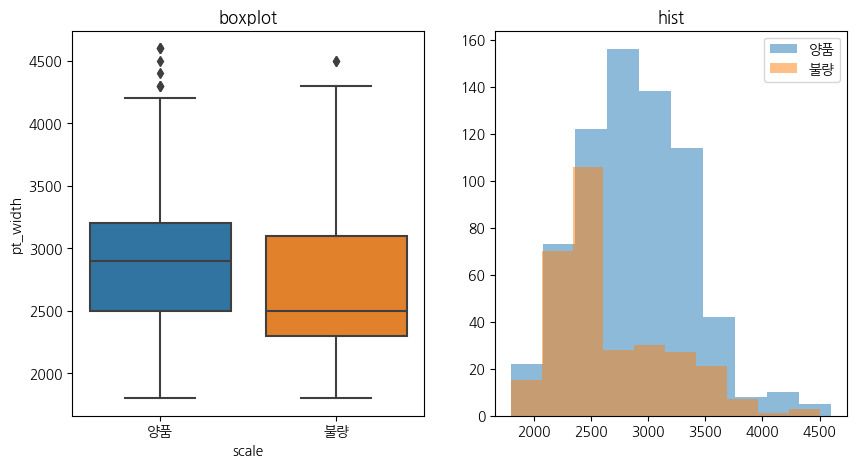

In [ ]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'pt_width', data = df)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df[df['scale'] == '양품']['pt_width'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['pt_width'], label = '불량', alpha = 0.5)
plt.legend()
plt.title('hist')

> fur_heat_temp
- 후판 압연에 있어서 가열의 의미는 1차로 소재를 열간 압연이 가능한 온도까지 승온시키는 것이다. 이에 따라, 일반 강에 대한 가열온도는 압연기의 능력, 제품의 치수 및 압연 능률(ton/hour) 등에 따라 변하지만, 통상 1100~1250℃ 정도이다

Text(0.5, 1.0, 'hist')

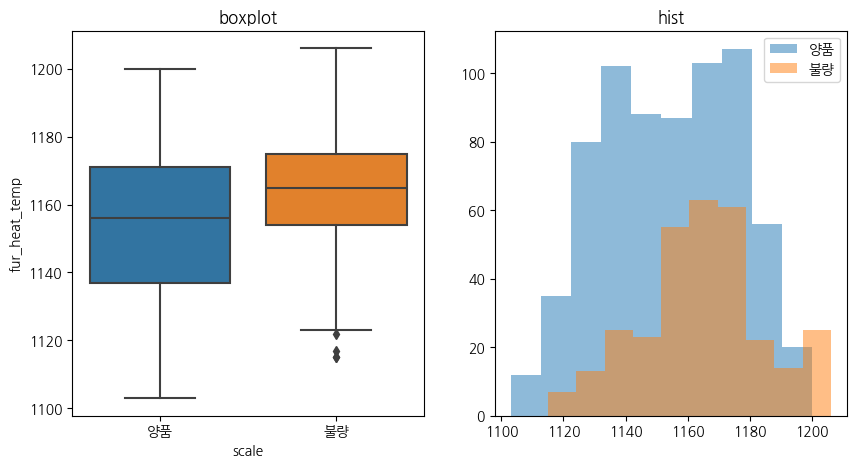

In [ ]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_heat_temp', data = df)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df[df['scale'] == '양품']['fur_heat_temp'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['fur_heat_temp'], label = '불량', alpha = 0.5)
plt.legend()
plt.title('hist')

- 히스토그램을 보았을 때 1200도를 넘는 순간 불량만 있는 것으로 보아 fur_heat_temp의 최대 양품 기준치는 1200도인 것으로 판단

> fur_heat_time


Text(0.5, 1.0, 'hist')

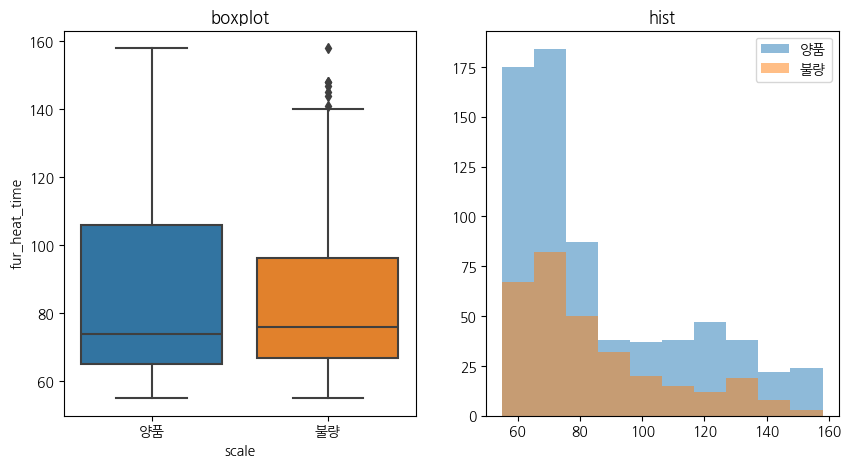

In [ ]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_heat_time', data = df)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df[df['scale'] == '양품']['fur_heat_time'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['fur_heat_time'], label = '불량', alpha = 0.5)
plt.legend()
plt.title('hist')

- 불량에서 이상치가 다수 보이지만 실제 양품에서도 같은 시간대에 많이 생산이 되고 있기 때문에 다른 변수에 영향을 어느정도 받아 불량으로 판별된 것으로 이상치로 보기는 힘들다고 판단

> fur_soak_temp

Text(0.5, 1.0, 'hist')

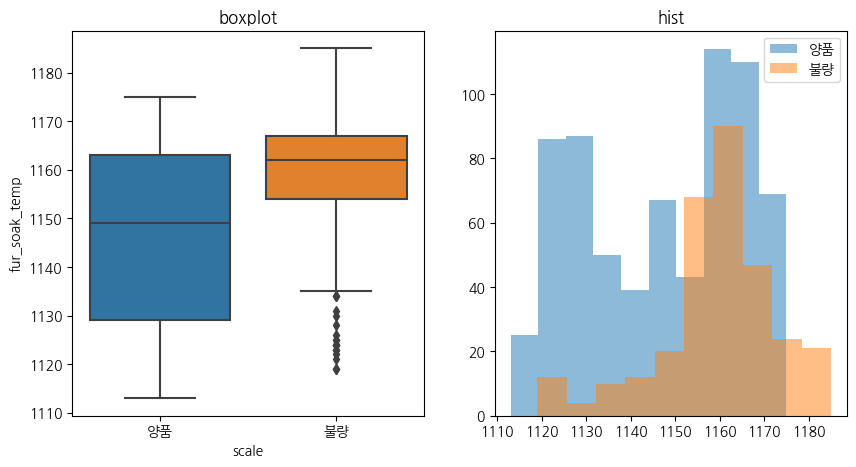

In [ ]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_soak_temp', data = df)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df[df['scale'] == '양품']['fur_soak_temp'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['fur_soak_temp'], label = '불량', alpha = 0.5)
plt.legend()
plt.title('hist')

- 불량에서 보이는 이상치는 현재 높은 온도에서 양품과 불량의 데이터가 몰려있기 때문에 그런 것이고 온도가 낮은 곳은 양품이 많이 생산된 것으로 보아 이상치로 보기는 힘듬
- 또한 1175도 이상 양품이 없고 모두 불량인 것으로 보아 양품의 기준치가 1175도라고 생각해 볼 수 있음

> fur_soak_time

Text(0.5, 1.0, 'hist')

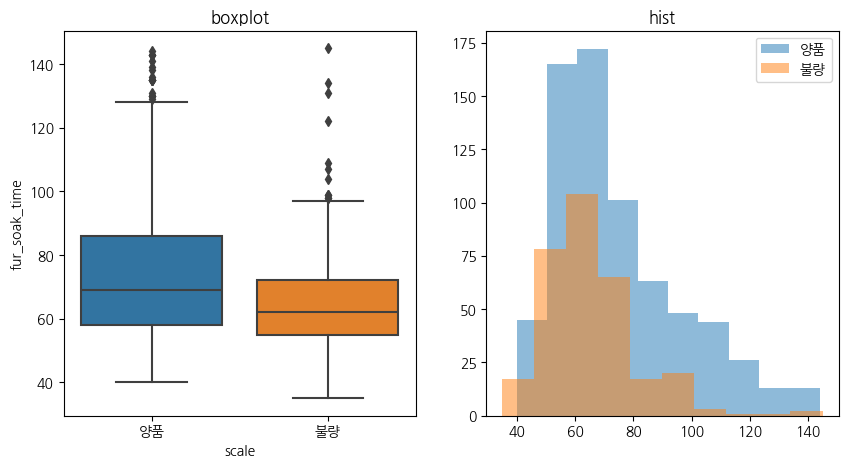

In [ ]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_soak_time', data = df)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df[df['scale'] == '양품']['fur_soak_time'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['fur_soak_time'], label = '불량', alpha = 0.5)
plt.legend()
plt.title('hist')

- 불량에서 거리가 상당히 떨어진 곳에 이상치가 있는 것이 있으나 같은 시간대에 양품 또한 생산량이 적지 않은 것을 보여 데이터가 낮은 시간대에 몰려있어 이상치로 판단을 한 것으로 보임

> fur_total_time

Text(0.5, 1.0, 'hist')

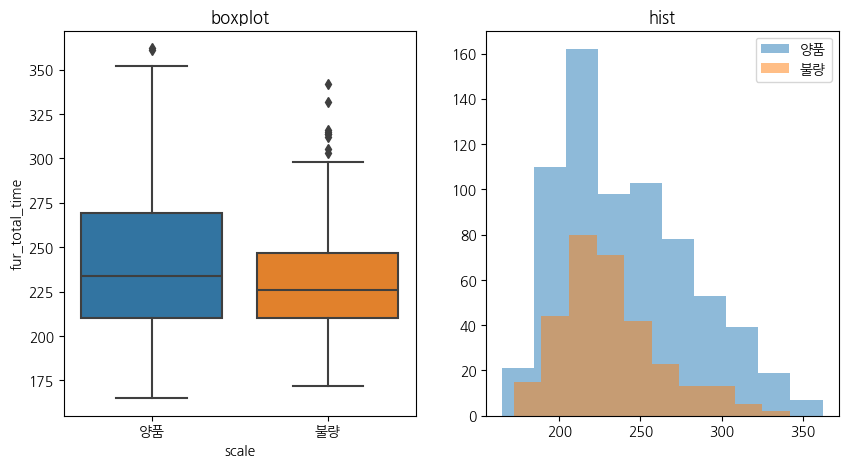

In [ ]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_total_time', data = df)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df[df['scale'] == '양품']['fur_total_time'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['fur_total_time'], label = '불량', alpha = 0.5)
plt.legend()
plt.title('hist')

> fur_ex_temp

Text(0.5, 1.0, 'hist')

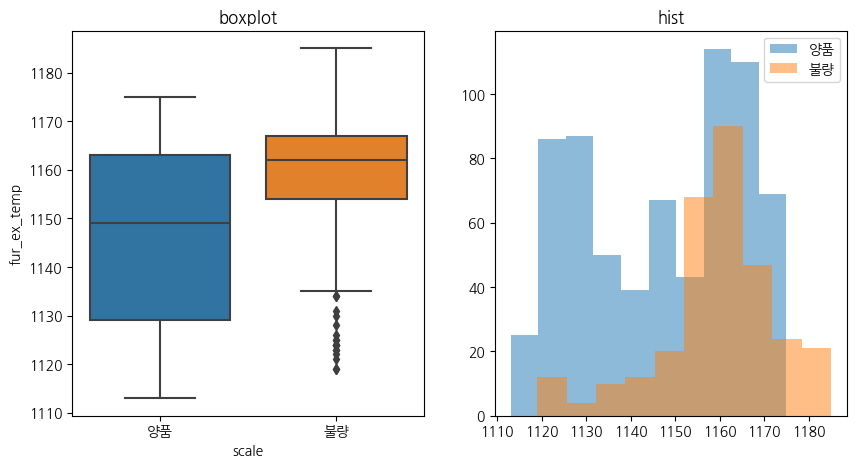

In [ ]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_ex_temp', data = df)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df[df['scale'] == '양품']['fur_ex_temp'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['fur_ex_temp'], label = '불량', alpha = 0.5)
plt.legend()
plt.title('hist')

- 위 온도 변수에서 본 것과 같이 이상치로 보긴 힘들며 오른쪽 히스토그램에서 1175이상 불량만 있는 것으로보아 온도 변수들의 기준치는 최대가 1175인 것으로 판단

> rolling_temp

Text(0.5, 1.0, 'hist')

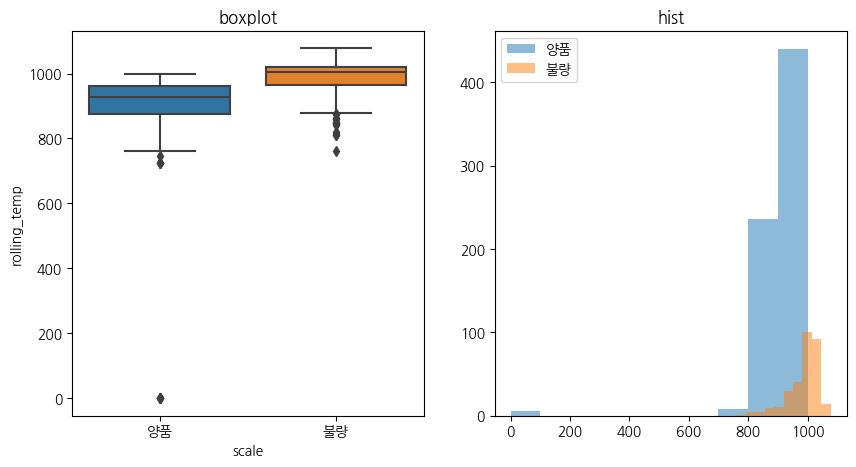

In [ ]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'rolling_temp', data = df)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df[df['scale'] == '양품']['rolling_temp'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['rolling_temp'], label = '불량', alpha = 0.5)
plt.legend()
plt.title('hist')

In [ ]:
df[df['rolling_temp'] < 200]

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
53,양품,독일,T,56,3800,11400,적용,3호기,2열,1132,95,1128,80,244,1128,TMCP(온도제어),0,6,1조
221,양품,일본,C,16,2200,43600,적용,3호기,2열,1163,57,1166,67,228,1166,CR(제어압연),0,10,2조
222,양품,일본,C,16,2200,43600,적용,3호기,1열,1169,64,1164,61,188,1164,CR(제어압연),0,10,2조
598,양품,한국,T,81,2100,12900,적용,2호기,1열,1133,89,1122,59,229,1122,CR(제어압연),0,6,3조
599,양품,한국,T,81,2100,13200,적용,1호기,2열,1130,92,1124,61,210,1124,CR(제어압연),0,6,3조
600,양품,영국,T,40,2500,23600,적용,3호기,1열,1119,109,1117,76,260,1117,TMCP(온도제어),0,6,3조


In [ ]:
df = df[df['rolling_temp'] > 200]

Text(0.5, 1.0, 'hist')

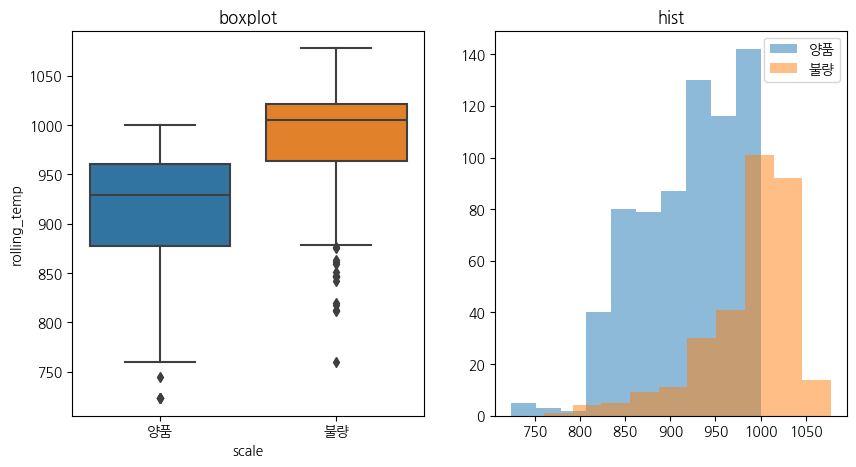

In [ ]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'rolling_temp', data = df)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df[df['scale'] == '양품']['rolling_temp'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['rolling_temp'], label = '불량', alpha = 0.5)
plt.legend()
plt.title('hist')

- 압연온도에서 명확하게 데이터가 한쪽으로 치우쳐져 있고 이상치로 보이는 데이터 값을 확인했을 때 압연온도가 0이라는 것은 말이 안되기 때문에 이상치로 판단하고 drop

# 탐색적 분석

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scale            992 non-null    object
 1   spec_country     992 non-null    object
 2   steel_kind       992 non-null    object
 3   pt_thick         992 non-null    int64 
 4   pt_width         992 non-null    int64 
 5   pt_length        992 non-null    int64 
 6   hsb              992 non-null    object
 7   fur_no           992 non-null    object
 8   fur_input_row    992 non-null    object
 9   fur_heat_temp    992 non-null    int64 
 10  fur_heat_time    992 non-null    int64 
 11  fur_soak_temp    992 non-null    int64 
 12  fur_soak_time    992 non-null    int64 
 13  fur_total_time   992 non-null    int64 
 14  fur_ex_temp      992 non-null    int64 
 15  rolling_method   992 non-null    object
 16  rolling_temp     992 non-null    int64 
 17  descaling_count  992 non-null    in

## 탐색적 기법(그래프)

### scale별 범주형 양품/불량률

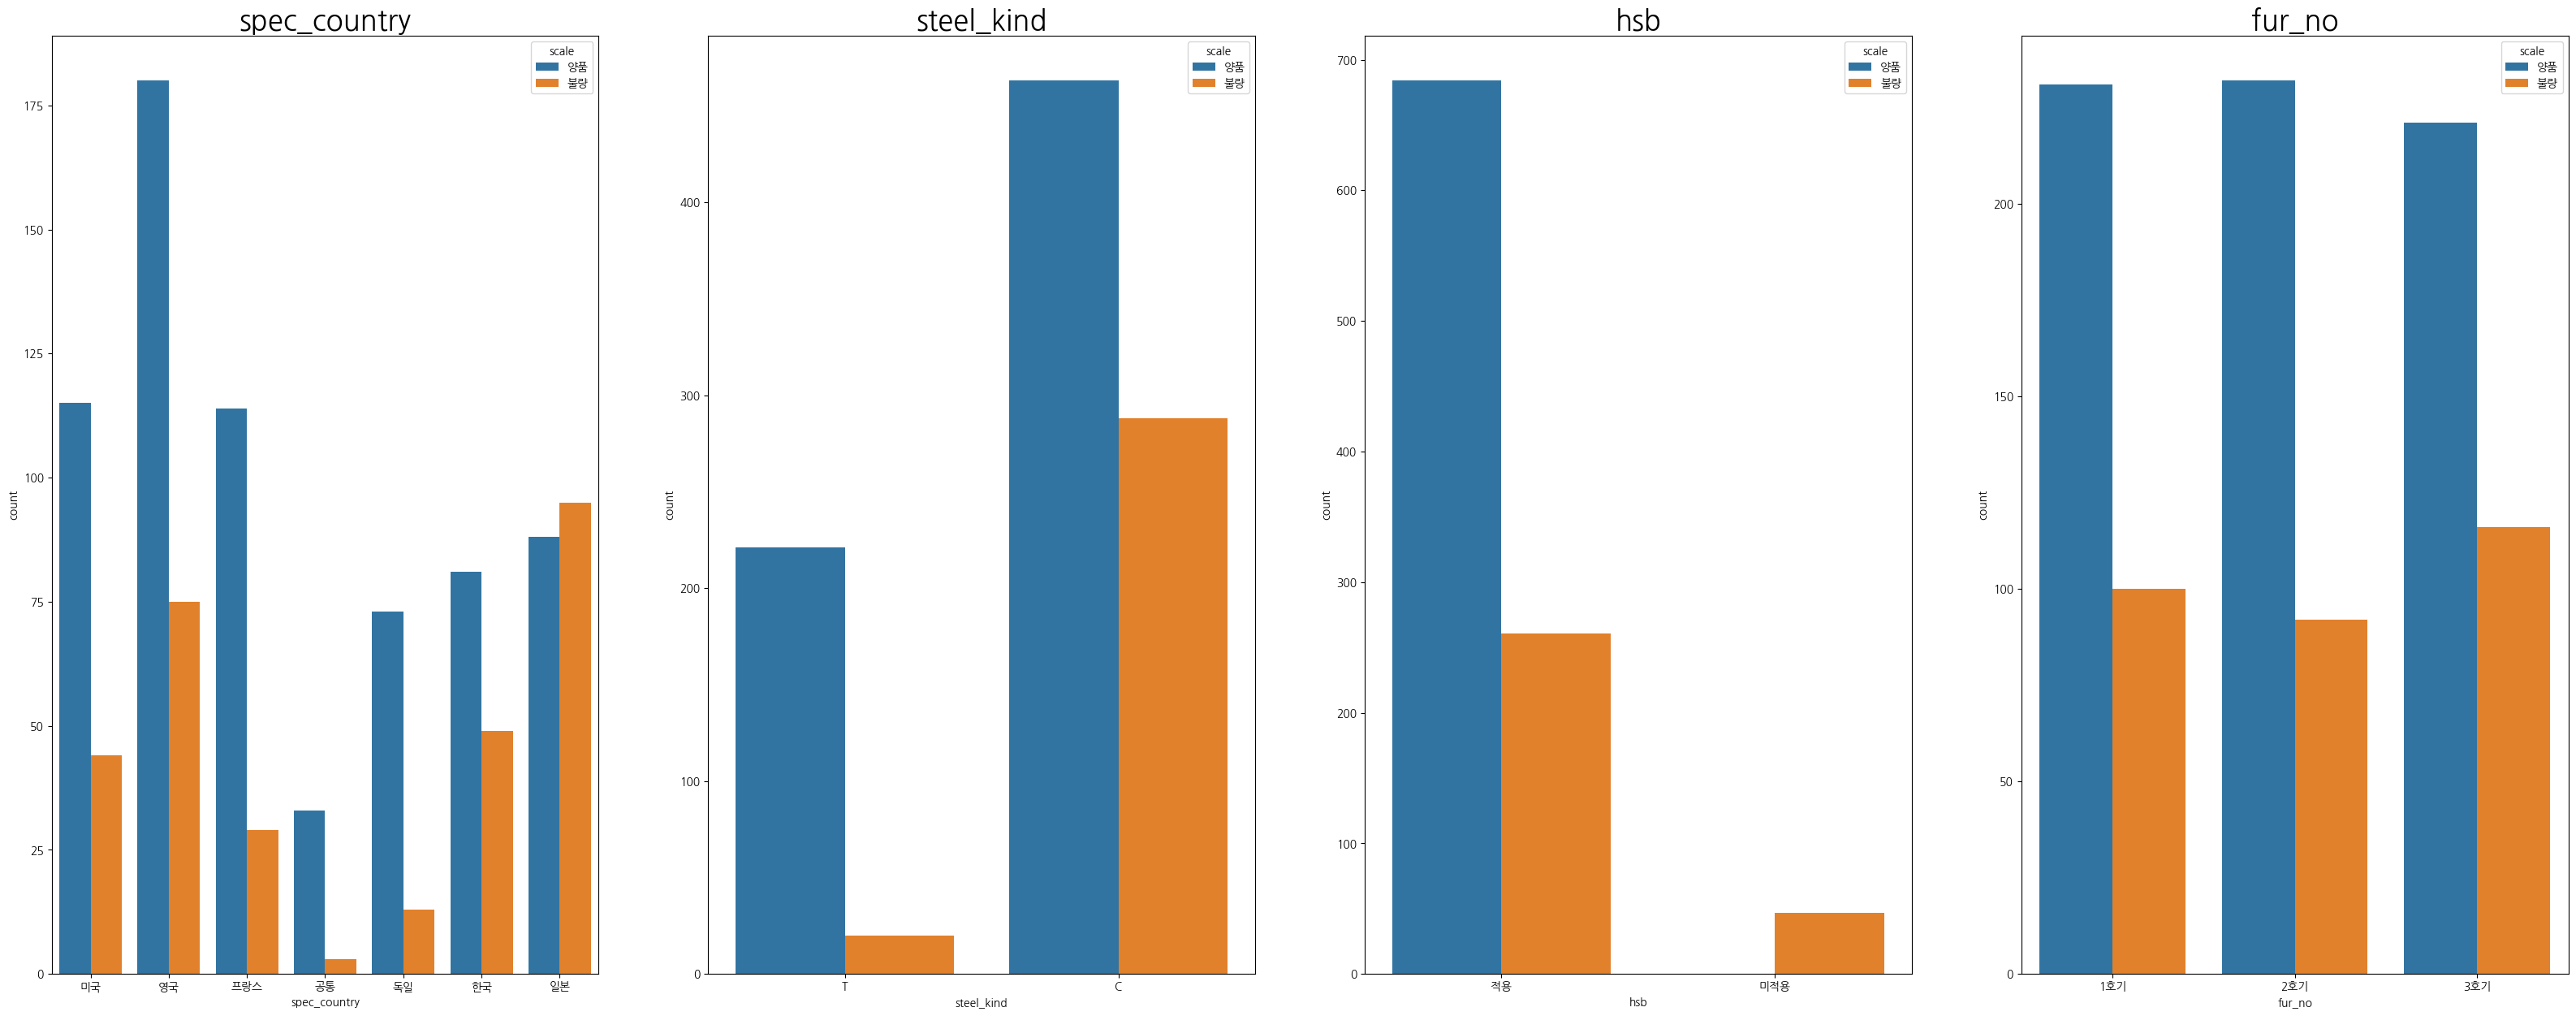

In [ ]:
plt.figure(figsize = (40,15))

plt.subplot(1,4,1)
sns.countplot(x = 'spec_country', hue = 'scale', data = df)
plt.title('spec_country', fontsize = 25)

plt.subplot(1,4,2)
sns.countplot(x = 'steel_kind', hue = 'scale', data = df)
plt.title('steel_kind', fontsize = 25)

plt.subplot(1,4,3)
sns.countplot(x = 'hsb', hue = 'scale', data = df)
plt.title('hsb', fontsize = 25)

plt.subplot(1,4,4)
sns.countplot(x = 'fur_no', hue = 'scale', data = df)
plt.title('fur_no', fontsize = 25)

plt.show()

> spec_country
- 기준국별 생산량이 미국과 영국이 높은 양품과 낮은 불량 대비 다른 기준국의 생산량이 높은 편은 아니며 한국과 일본은 양품과 불량이 거의 비슷한 것을 볼 수 있음

> steel_kind
- 티타늄의 경우 후판 생산량이 C(탄소)에 비해 낮아 불량이 낮아보이는 것이고 C는 생산량은 높으나 양품대비 불량이 양품의 반 이상이 넘게 나오는 것으로 보임

> hsb
- hsb의 경우 미적용하였을 때 양품이 0이고 불량이 모두를 차지하는 것을 보아  적용했을 때 다른 변수들의 영향을 받아 불량으로 분류되며 hsb가 적용되었다는 가정하에 양품/불량을 분류하는데 있어 그렇게 큰 영향은 없을 것으로 판단

> fur-no
- fur_no 또한 1호기,2호기,3호기 모두 같은 생산량을 보이고 있고 불량률 또한 비슷한 불량을 보이는 것으로 호기별 양품과 불량을 분류하는데 있어 영향이 거의 없을 것으로 판단

Text(0.5, 1.0, 'work_group')

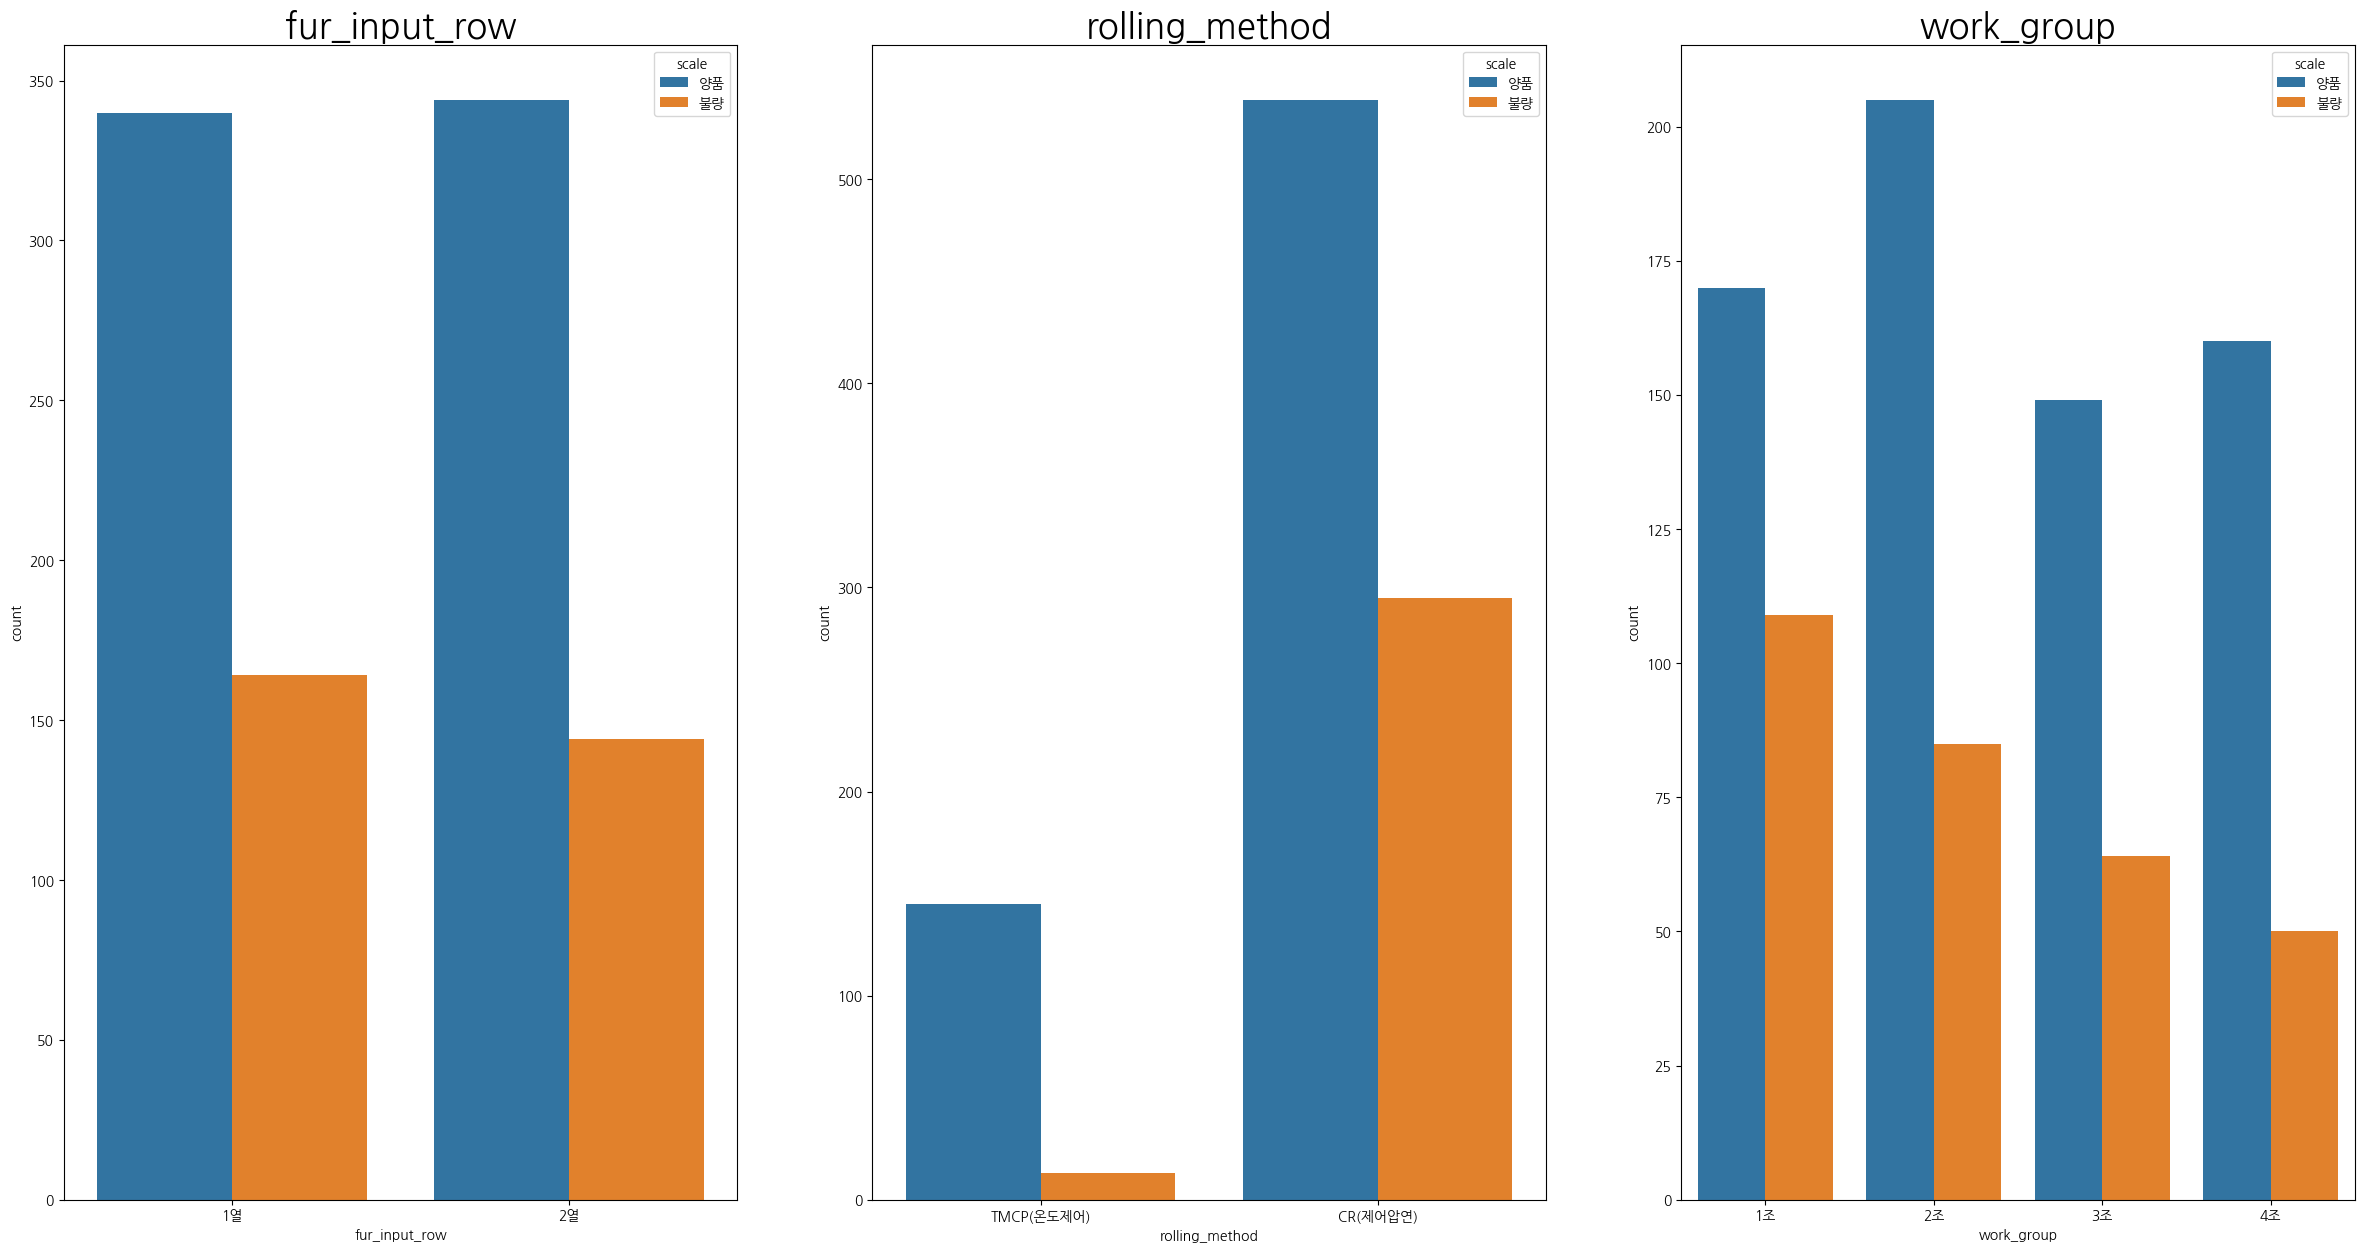

In [ ]:
plt.figure(figsize = (40,15))

plt.subplot(1,4,1)
sns.countplot(x = 'fur_input_row', hue = 'scale', data = df)
plt.title('fur_input_row', fontsize = 25)

plt.subplot(1,4,2)
sns.countplot(x = 'rolling_method', hue = 'scale', data = df)
plt.title('rolling_method', fontsize = 25)

plt.subplot(1,4,3)
sns.countplot(x = 'work_group', hue = 'scale', data = df)
plt.title('work_group', fontsize = 25)

> fur_input_row
- 위 fur_no 변수와 같이 1열,2열 모두 비슷한 생산량과 불량률을 보이기 때문에 목표변수 분류에 있어 큰 영향은 없을 것으로 판단

> rolling_method
- 압연 방법 중 온도제어는 생산량 자체가 낮아 제어압연에서 불량과 생산량이 많아 영향이 조금 클 것으로 보임

> work_group
- 1,2,3,4조 중 2조가 가장 많은 생산량 대비 불량률이 적고 1조가 생산량에 비해 불량률이 50%가 넘는 것으로 보아 1조가 다른 조에 비해 불량률에 큰 비율을 차지하는 것으로 보임

### scale별 연속형 양품/불량률

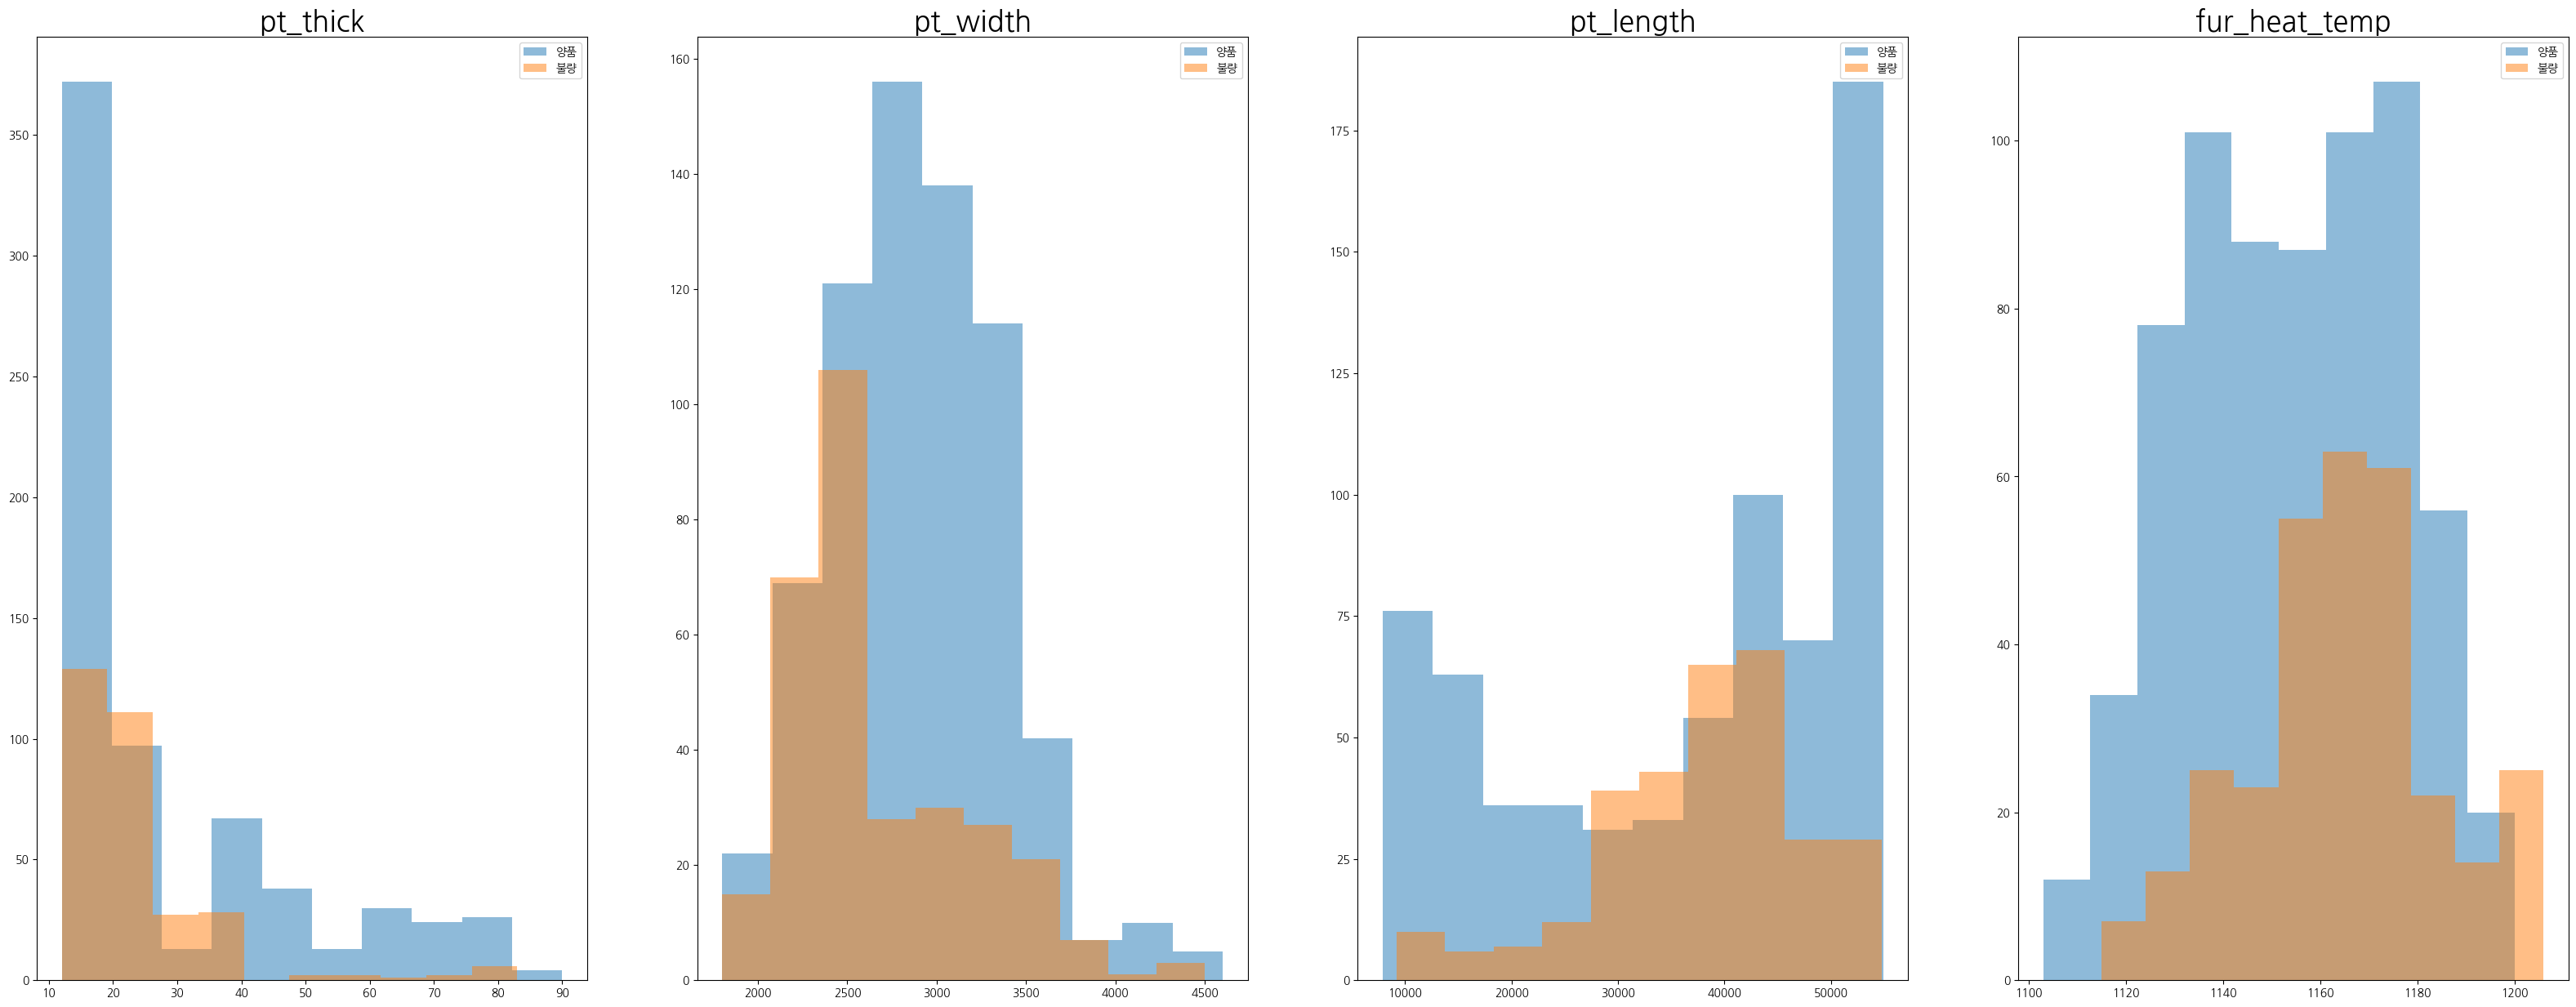

In [ ]:
plt.figure(figsize = (40,15))

plt.subplot(1,4,1)
plt.hist(df[df['scale'] == '양품']['pt_thick'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['pt_thick'], label = '불량', alpha = 0.5)
plt.legend()
plt.title('pt_thick', fontsize = 25)

plt.subplot(1,4,2)
plt.hist(df[df['scale'] == '양품']['pt_width'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['pt_width'], label = '불량', alpha = 0.5)
plt.legend()
plt.title('pt_width', fontsize = 25)

plt.subplot(1,4,3)
plt.hist(df[df['scale'] == '양품']['pt_length'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['pt_length'], label = '불량', alpha = 0.5)
plt.legend()
plt.title('pt_length', fontsize = 25)

plt.subplot(1,4,4)
plt.hist(df[df['scale'] == '양품']['fur_heat_temp'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['fur_heat_temp'], label = '불량', alpha = 0.5)
plt.legend()
plt.title('fur_heat_temp', fontsize = 25)

plt.show()

> pt_thick
- 후판의 생산량이 두께가 10~30mm 사이로 많이 생산되는 것으로 그래프가 한 쪽으로 치우쳐져 있기 때문에 목표변수 분류에 영향이 있을 것으로 판단

> pt_width
- 특정 너비 구간에서 많은 불량률이 나오는 것으로 보아 2000~2500 구간 불량률이 나오는 원인일 수 있다고 판단

> pt_length
- 길이가 50000이상 일 때 양품 생산이 가장 높고 불량이 생산량 대비 낮은 것으로 보이고 25000~45000 사이로는 양품과 불량이 거의 비슷한 것으로 보아 저 구간이 불량의 영향일 수 있다고 판단

> fur_hest_temp
- dhsehrk 1150~1180 사이에 불량률이 다른 곳에 비해 높지만 양품 또한 다른 구간과 비슷하게 높기 때문에 저 구간은 사실상 다른 변수에 의해 불량으로 분류되었다고 판단
- 또한 1200도가 넘어가는 순간 양품이 0 이고 불량이 높은 것으로 보아 fur_heat_temp에서 1200도가 양품의 최대 기준치인 것으로 판단

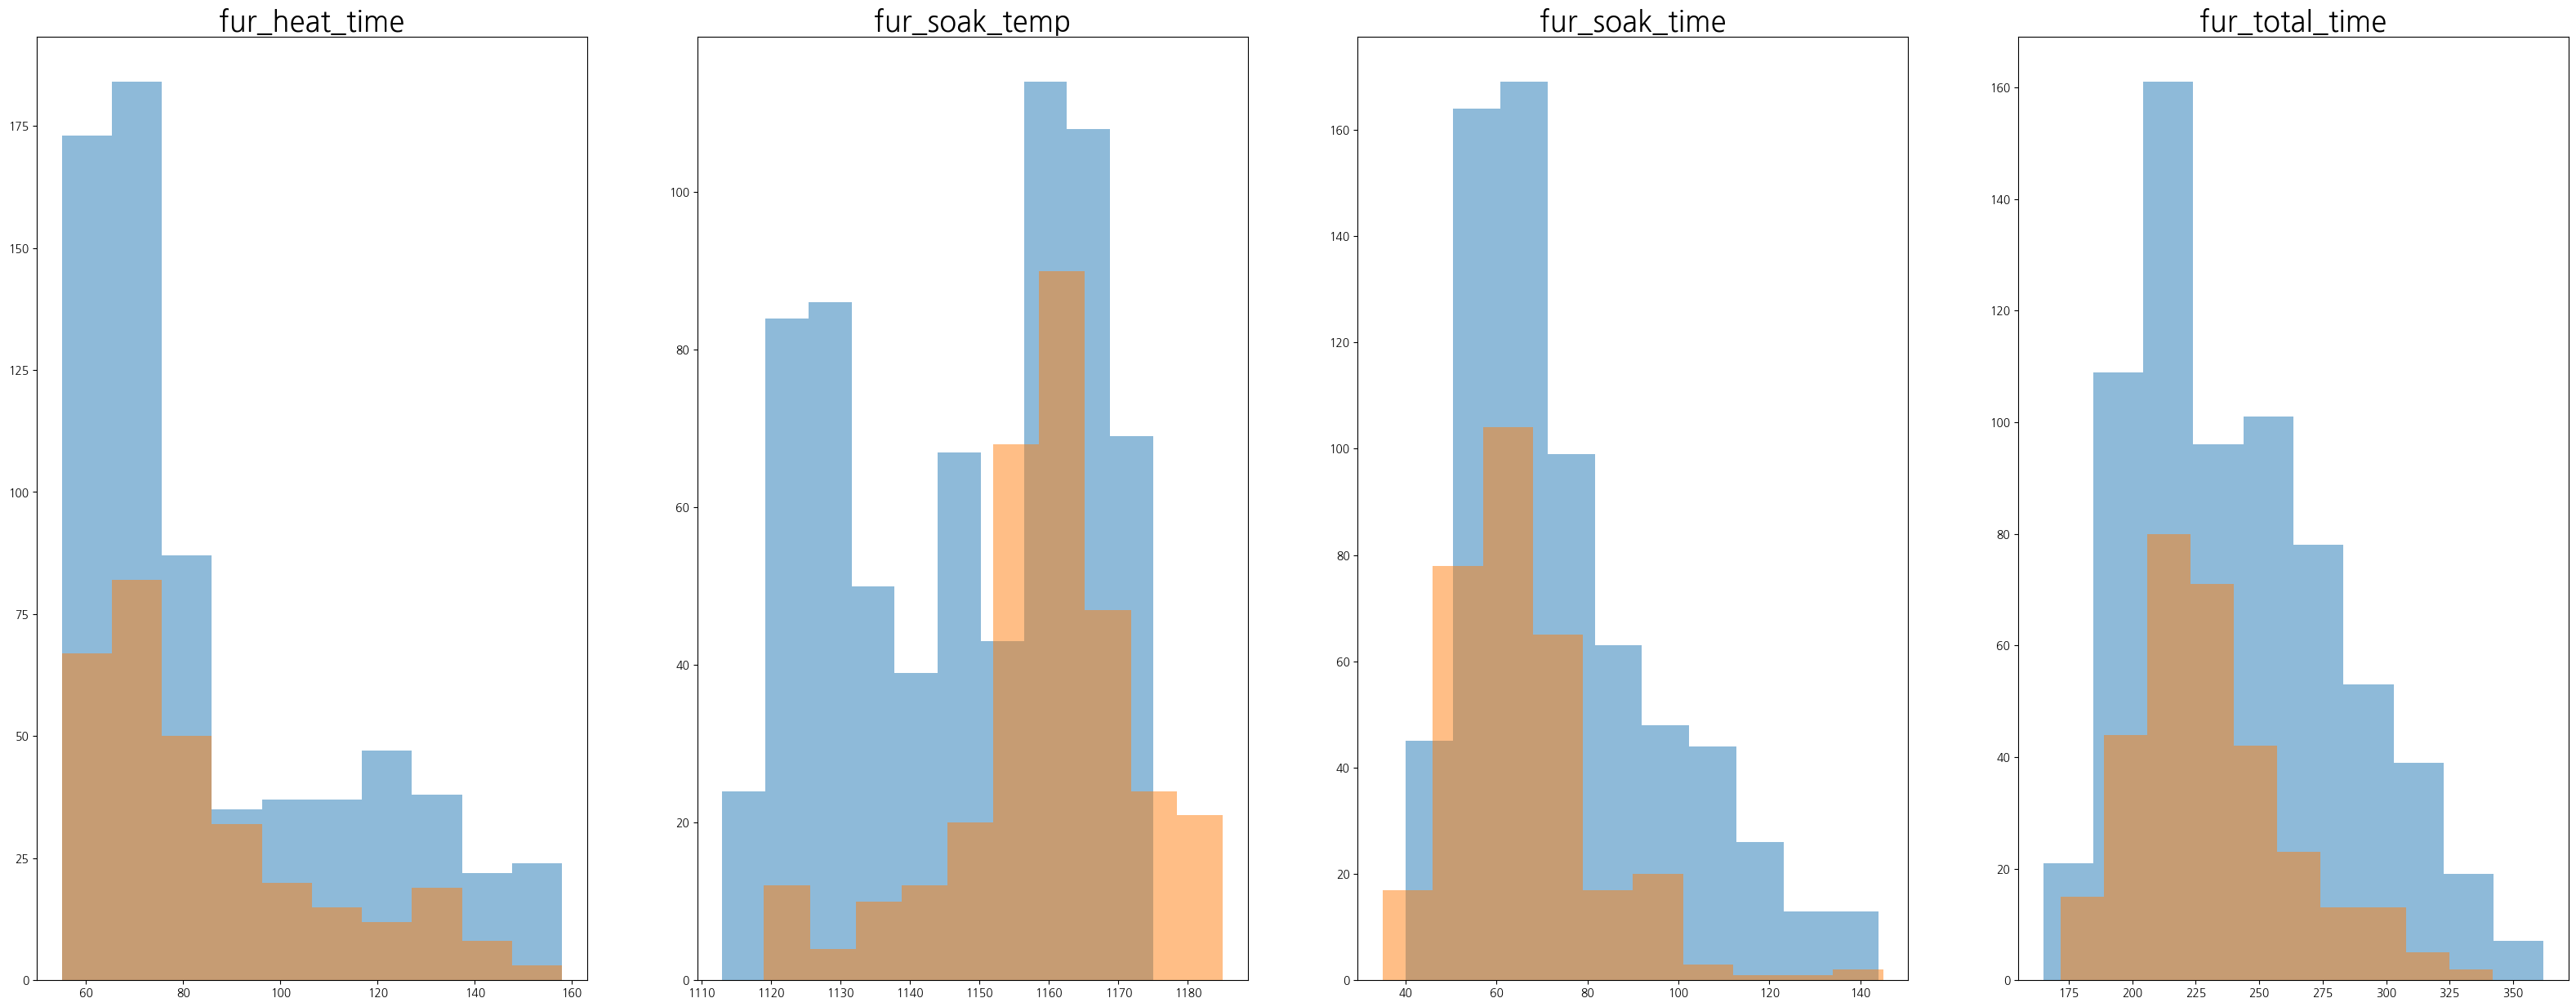

In [ ]:
plt.figure(figsize = (40,15))

plt.subplot(1,4,1)
plt.hist(df[df['scale'] == '양품']['fur_heat_time'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['fur_heat_time'], label = '불량', alpha = 0.5)
plt.title('fur_heat_time', fontsize = 25)

plt.subplot(1,4,2)
plt.hist(df[df['scale'] == '양품']['fur_soak_temp'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['fur_soak_temp'], label = '불량', alpha = 0.5)
plt.title('fur_soak_temp', fontsize = 25)

plt.subplot(1,4,3)
plt.hist(df[df['scale'] == '양품']['fur_soak_time'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['fur_soak_time'], label = '불량', alpha = 0.5)
plt.title('fur_soak_time', fontsize = 25)

plt.subplot(1,4,4)
plt.hist(df[df['scale'] == '양품']['fur_total_time'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['fur_total_time'], label = '불량', alpha = 0.5)
plt.title('fur_total_time', fontsize = 25)

plt.show()

> fur_heat_time
- 이 변수에서 40~90사이 생산량이 높고 불량률도 다른 구간에 비해 높은 것으로 보아 다른 변수의 영향이 큰 것으로 판단

> fur_soak_temp
- 이 변수 또한 온도에서 양품의 최대 기준치를 가지는 것으로 보이고 양품 생산량이 높은 구간에서 불량률 또한 최대치인 것으로 보아 저 구간에서의 불량은 다른 변수로 인한 불량이 많은 것으로 판단

> fur_soak_time
- 변수에서 양품과 불량의 구간별 비율이 비슷한 것을 보아 영향이 크게 없음을 판단

> fur_total_time
- 변수에서 양품과 불량의 구간별 비율이 비슷한 것을 보아 영향이 크게 없음을 판단

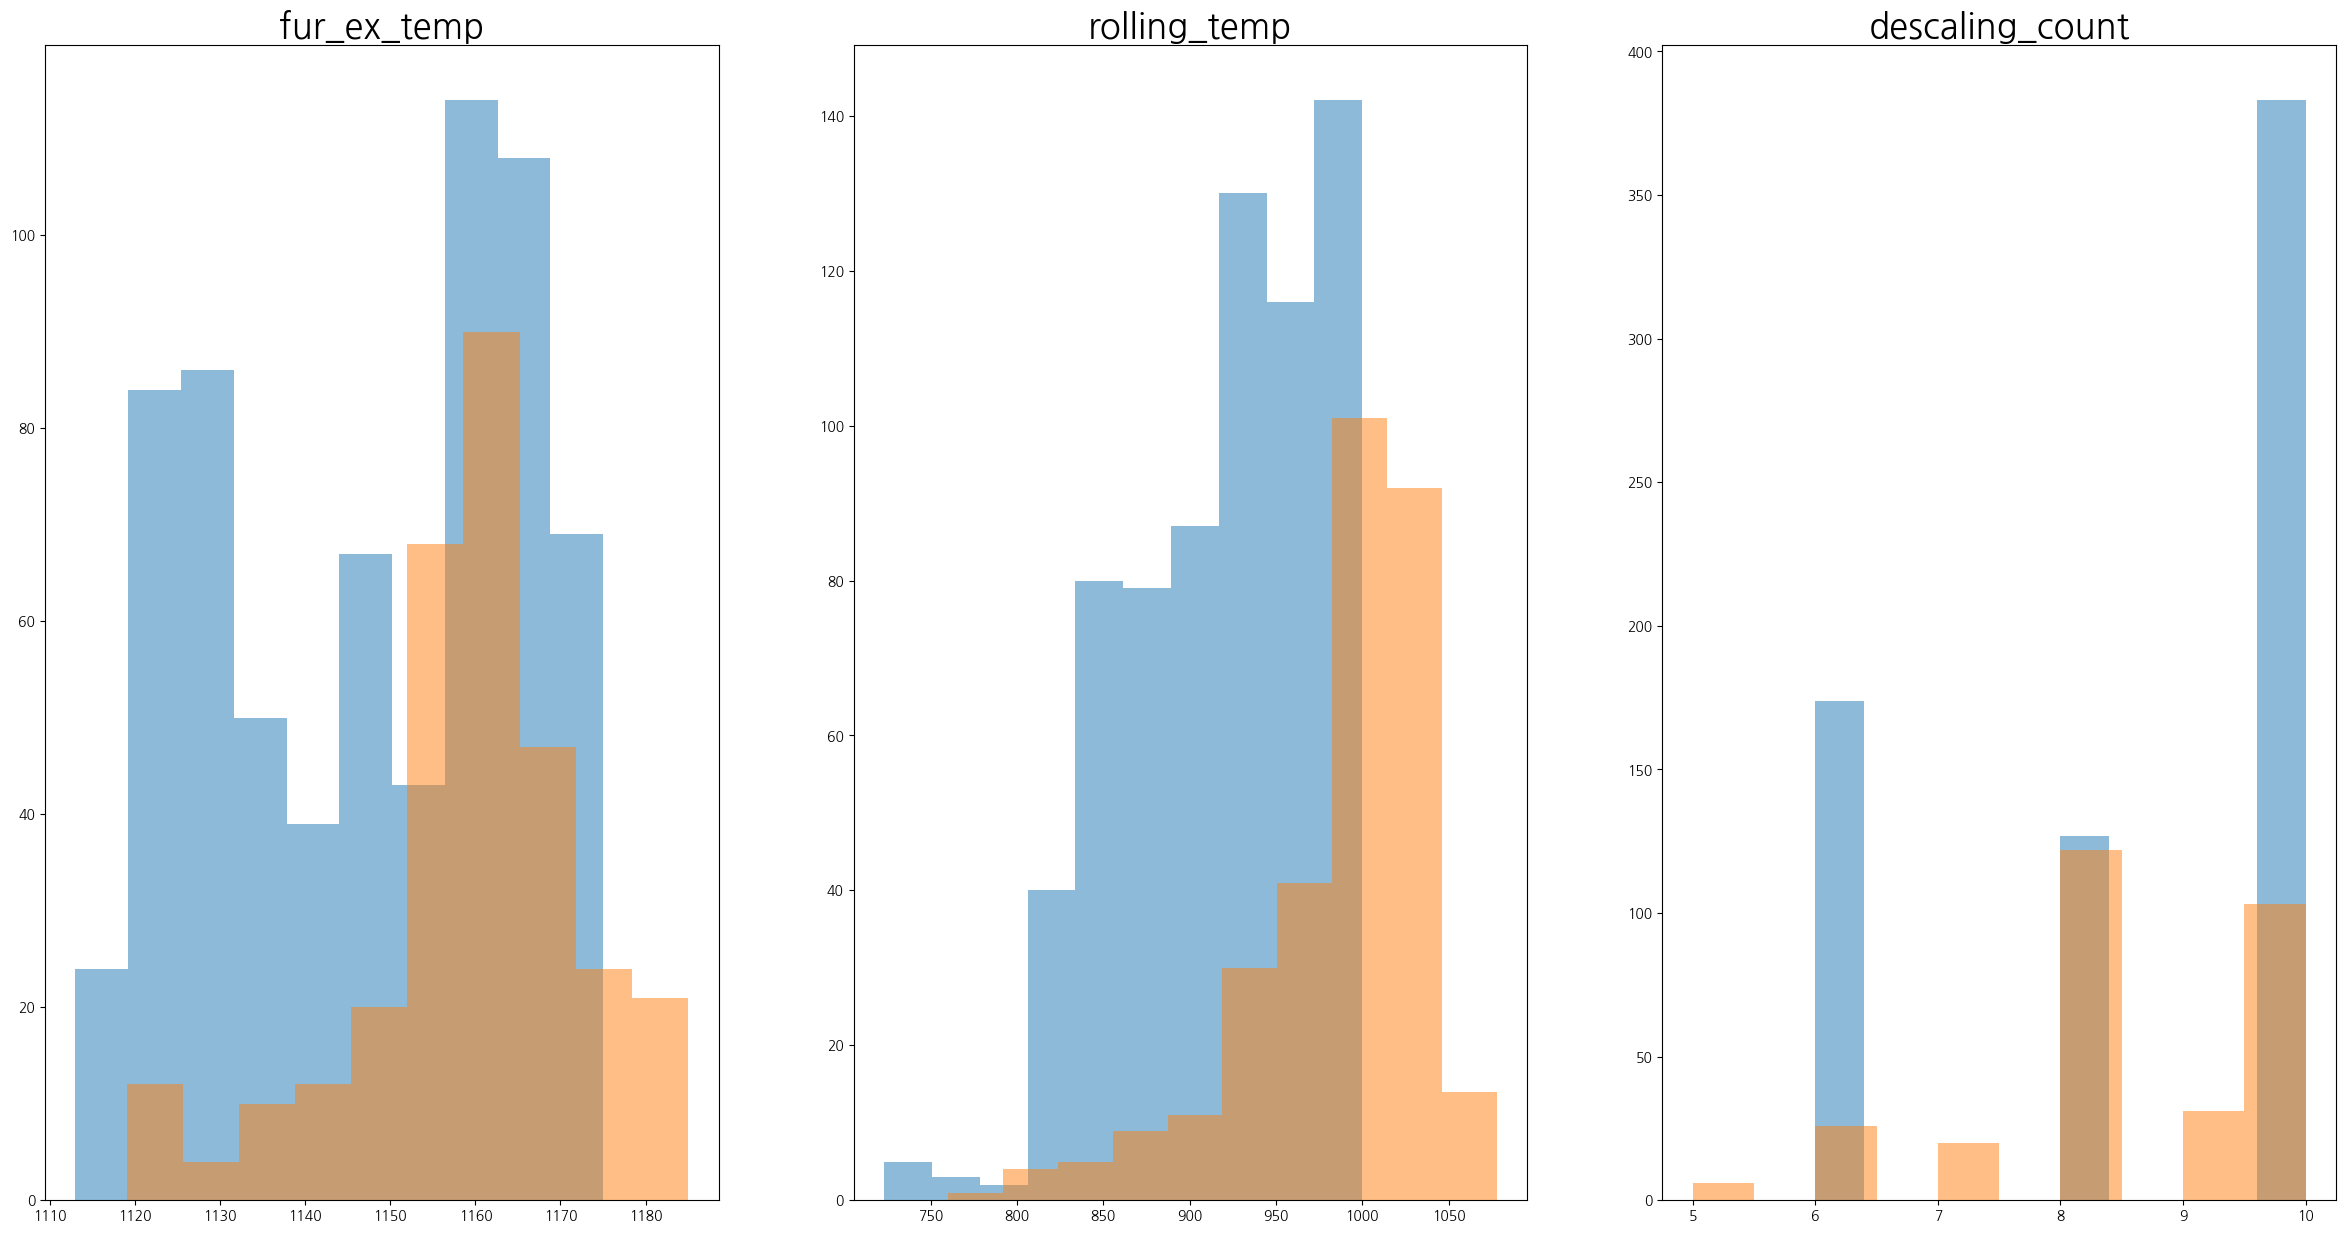

In [ ]:
plt.figure(figsize = (40,15))

plt.subplot(1,4,1)
plt.hist(df[df['scale'] == '양품']['fur_ex_temp'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['fur_ex_temp'], label = '불량', alpha = 0.5)
plt.title('fur_ex_temp', fontsize = 25)

plt.subplot(1,4,2)
plt.hist(df[df['scale'] == '양품']['rolling_temp'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['rolling_temp'], label = '불량', alpha = 0.5)
plt.title('rolling_temp', fontsize = 25)

plt.subplot(1,4,3)
plt.hist(df[df['scale'] == '양품']['descaling_count'] , label = '양품', alpha = 0.5)
plt.hist(df[df['scale'] == '불량']['descaling_count'], label = '불량', alpha = 0.5)
plt.title('descaling_count', fontsize = 25)


plt.show()

> fur_ex_temp
- 대부분 온도변수에서 높은 양품 생산량에서 높은 불량률이 나오고 있기에 특정 온도 구간에서 생산되는 후판에서 공통적으로 영향을 주는 다른 변수를 탐색해봐야할 것으로 판단

> rolling_temp
- 양품 기준치가 명확하게 1000인 것으로 보이며 주변 구간에서 많은 불량률이 보이고 있어서 온도변수들의 구간별 공통적인 영향이 있는 것으로 판단

> descaling_count
- 압연횟수에서 5,7,9에서 불량만 나오고 있지만 압연 횟수 설정에서의 오류로 인한 불량으로 판단되며 이유는 불량 개수 자체가 낮지 않기 때문임

### pairplot

- 각 변수들 끼리의 분포를 보여주고 있고 서로 비슷한 분포를 보여주고 있는 변수들까리 상관성이 높다는 것으로 판단됨


In [ ]:
sns.pairplot(df ,hue='scale')

Output hidden; open in https://colab.research.google.com to view.

### heatmap

In [ ]:
df.corr().round(3)

<ipython-input-51-8faa7a8256e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(3)


,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
pt_thick,1.000,-0.317,-0.869,-0.524,0.211,-0.671,0.376,0.356,-0.671,-0.473,-0.848
pt_width,-0.317,1.000,0.145,0.200,-0.104,0.217,-0.103,-0.140,0.217,-0.152,0.352
pt_length,-0.869,0.145,1.000,0.465,-0.137,0.600,-0.341,-0.282,0.600,0.375,0.816
fur_heat_temp,-0.524,0.200,0.465,1.000,-0.162,0.785,-0.377,-0.317,0.785,0.346,0.482
fur_heat_time,0.211,-0.104,-0.137,-0.162,1.000,-0.348,0.114,0.737,-0.348,-0.132,-0.165
fur_soak_temp,-0.671,0.217,0.600,0.785,-0.348,1.000,-0.602,-0.565,1.000,0.632,0.624
fur_soak_time,0.376,-0.103,-0.341,-0.377,0.114,-0.602,1.000,0.633,-0.602,-0.486,-0.406
fur_total_time,0.356,-0.140,-0.282,-0.317,0.737,-0.565,0.633,1.000,-0.565,-0.344,-0.344
fur_ex_temp,-0.671,0.217,0.600,0.785,-0.348,1.000,-0.602,-0.565,1.000,0.632,0.624
rolling_temp,-0.473,-0.152,0.375,0.346,-0.132,0.632,-0.486,-0.344,0.632,1.000,0.321


- heatmap을 통하여 연속형 변수들끼리의 상관성을 상관계수인 수치로 나타내면서 색의 차이를 통해 얼마나 서로 상관이 있는지를 사람이 보기 쉽게 시각화를 하면서 보여주고 있음


<ipython-input-52-c43df93b6ae2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

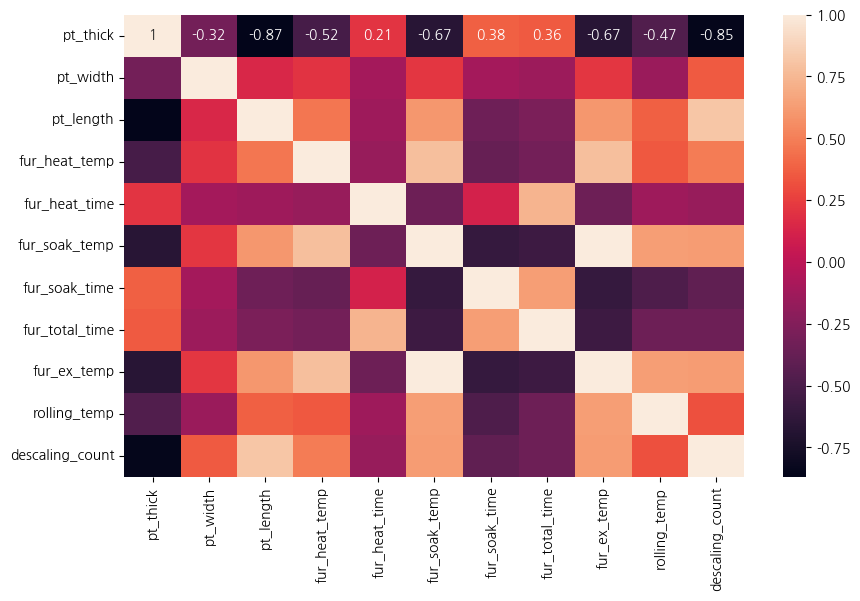

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True)

- 온도 변수끼리 상관계수가 다른 변수에 비해 높은 것으로 보아 상관성이 서로 큰 것으로 보임
- time 변수끼리 또한 상관계수가 어느정도 높은 것으로 보임
- descaling_count는 온도와 시간 변수 보다는 후판의 기준이 되는 규격(두께,너비,길이) 등과 상관성이 어느정도 있는 것으로 보임

## 탐색적 기법(검정)

In [ ]:
df['scale'] = df['scale'].map({'양품': 1, '불량':0})

In [ ]:
# 가설검정 및 통계 분석 패키지
import scipy.stats as stats
from statsmodels.formula.api import ols

In [ ]:
# 각각의 상관성

#spec_country
cross_tab1 = pd.crosstab(df['scale'], df['spec_country'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "spec_country chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()

#steel_kind
cross_tab3 = pd.crosstab(df['scale'], df['steel_kind'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab3)
print( "steel_kind chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()
#fur_no
cross_tab4 = pd.crosstab(df['scale'], df['fur_no'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab4)
print( "fur_no chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()
#fur_input_row
cross_tab5 = pd.crosstab(df['scale'], df['fur_input_row'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab5)
print( "fur_input_row chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()
#rolling_method
cross_tab6 = pd.crosstab(df['scale'], df['rolling_method'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab6)
print( "rolling_method chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()
#work_group
cross_tab7 = pd.crosstab(df['scale'], df['work_group'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab7)
print( "work_group chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()

#hsb
cross_tab8 = pd.crosstab(df['scale'], df['hsb'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab8)
print( "hsb chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()

spec_country chi-square test 
 chisq: 67.68
 p-value : 0.000
 degree of freedom: 6

steel_kind chi-square test 
 chisq: 75.56
 p-value : 0.000
 degree of freedom: 1

fur_no chi-square test 
 chisq: 2.96
 p-value : 0.227
 degree of freedom: 2

fur_input_row chi-square test 
 chisq: 0.93
 p-value : 0.336
 degree of freedom: 1

rolling_method chi-square test 
 chisq: 44.46
 p-value : 0.000
 degree of freedom: 1

work_group chi-square test 
 chisq: 14.03
 p-value : 0.003
 degree of freedom: 3

hsb chi-square test 
 chisq: 106.21
 p-value : 0.000
 degree of freedom: 1



> 범주형
- 유의 변수 : spec_country, steel_kind,rolling_method, work_group, hsb
- 범주형 목표변수에 대해 범주형 설명변수와의 상관성의 유의성을 검정하는 카이제곱 검정을 통해 유의수준을 0.05인 5%로 정해 0.05보다 낮은 spec_country, steel_kind, rolling_method, work_group, hsb 총 5개의 범주형 변수가 목표변수에 대해 상관성이 유의한 것으로 판단

In [ ]:
df_num = df.select_dtypes(exclude = "object")
df_num.columns

Index(['scale', 'pt_thick', 'pt_width', 'pt_length', 'fur_heat_temp',
       'fur_heat_time', 'fur_soak_temp', 'fur_soak_time', 'fur_total_time',
       'fur_ex_temp', 'rolling_temp', 'descaling_count'],
      dtype='object')

In [ ]:
# 피어슨 상관분석
correlation_matrix = df_num.corr()

# 상관계수 출력
print(correlation_matrix)
print()
# pt_thick p-value 출력
correlation, p_value = stats.pearsonr(df_num['scale'], df_num['pt_thick'])
print("pt_thick 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# pt_width p-value 출력
correlation, p_value = stats.pearsonr(df_num['scale'], df_num['pt_width'])
print("pt_width 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# pt_length p-value 출력
correlation, p_value = stats.pearsonr(df_num['scale'], df_num['pt_length'])
print("pt_length 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# fur_heat_temp p-value 출력
correlation, p_value = stats.pearsonr(df_num['scale'], df_num['fur_heat_temp'])
print("fur_heat_temp 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# fur_heat_time p-value 출력
correlation, p_value = stats.pearsonr(df_num['scale'], df_num['fur_heat_time'])
print("fur_heat_time 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# fur_soak_temp p-value 출력
correlation, p_value = stats.pearsonr(df_num['scale'], df_num['fur_soak_temp'])
print("fur_soak_temp 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# fur_soak_time p-value 출력
correlation, p_value = stats.pearsonr(df_num['scale'], df_num['fur_soak_time'])
print("fur_soak_time 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# fur_total_time p-value 출력
correlation, p_value = stats.pearsonr(df_num['scale'], df_num['fur_total_time'])
print("fur_total_time 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# fur_ex_temp p-value 출력
correlation, p_value = stats.pearsonr(df_num['scale'], df_num['fur_ex_temp'])
print("fur_ex_temp 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# rolling_temp p-value 출력
correlation, p_value = stats.pearsonr(df_num['scale'], df_num['rolling_temp'])
print("rolling_temp 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# descaling_count p-value 출력
correlation, p_value = stats.pearsonr(df_num['scale'], df_num['descaling_count'])
print("descaling_count 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()

                    scale  pt_thick  pt_width  pt_length  fur_heat_temp  \
scale            1.000000  0.108732  0.191221  -0.055173      -0.224184   
pt_thick         0.108732  1.000000 -0.317426  -0.868516      -0.523604   
pt_width         0.191221 -0.317426  1.000000   0.145199       0.199658   
pt_length       -0.055173 -0.868516  0.145199   1.000000       0.465232   
fur_heat_temp   -0.224184 -0.523604  0.199658   0.465232       1.000000   
fur_heat_time    0.035751  0.210794 -0.104198  -0.137041      -0.162096   
fur_soak_temp   -0.329101 -0.671008  0.217446   0.600342       0.785426   
fur_soak_time    0.219280  0.376280 -0.103041  -0.340842      -0.376956   
fur_total_time   0.127632  0.355545 -0.139522  -0.282371      -0.316524   
fur_ex_temp     -0.329101 -0.671008  0.217446   0.600342       0.785426   
rolling_temp    -0.508969 -0.473482 -0.152084   0.375150       0.345737   
descaling_count  0.038798 -0.848480  0.351776   0.815787       0.482339   

                 fur_hea

> 연속형 변수
- 유의성 검정 : pt_thick,pt_width, fur_heat_temp, fur_soak_temp, fur_soak_time, fur_total_time, fur_ex_temp, rolling_temp
- 범주형 목표변수에 대해 연속형 설명변수가 상관성이 유의한지를 검정하기 위해 pearson 상관분석 검정을 통해 유의수준 0.05 보다 낮은 pt_thick,pt_width, fur_heat_temp, fur_soak_temp, fur_soak_time, fur_total_time, fur_ex_temp, rolling_temp 총 8개의 연속형 변수가 유의한 것으로 판단

In [ ]:
df.corr()

<ipython-input-58-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
scale,1.000000,0.108732,0.191221,-0.055173,-0.224184,0.035751,-0.329101,0.219280,0.127632,-0.329101,-0.508969,0.038798
pt_thick,0.108732,1.000000,-0.317426,-0.868516,-0.523604,0.210794,-0.671008,0.376280,0.355545,-0.671008,-0.473482,-0.848480
pt_width,0.191221,-0.317426,1.000000,0.145199,0.199658,-0.104198,0.217446,-0.103041,-0.139522,0.217446,-0.152084,0.351776
pt_length,-0.055173,-0.868516,0.145199,1.000000,0.465232,-0.137041,0.600342,-0.340842,-0.282371,0.600342,0.375150,0.815787
fur_heat_temp,-0.224184,-0.523604,0.199658,0.465232,1.000000,-0.162096,0.785426,-0.376956,-0.316524,0.785426,0.345737,0.482339
fur_heat_time,0.035751,0.210794,-0.104198,-0.137041,-0.162096,1.000000,-0.347868,0.114097,0.736522,-0.347868,-0.131758,-0.164852
fur_soak_temp,-0.329101,-0.671008,0.217446,0.600342,0.785426,-0.347868,1.000000,-0.602187,-0.565288,1.000000,0.631735,0.623875
fur_soak_time,0.219280,0.376280,-0.103041,-0.340842,-0.376956,0.114097,-0.602187,1.000000,0.632530,-0.602187,-0.485669,-0.405830
fur_total_time,0.127632,0.355545,-0.139522,-0.282371,-0.316524,0.736522,-0.565288,0.632530,1.000000,-0.565288,-0.344164,-0.344076
fur_ex_temp,-0.329101,-0.671008,0.217446,0.600342,0.785426,-0.347868,1.000000,-0.602187,-0.565288,1.000000,0.631735,0.623875


# 모델링

### 로지스틱 회귀분석

In [ ]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 로지스틱 회귀
from statsmodels.api import Logit
# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df.corr()

<ipython-input-60-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
scale,1.000000,0.108732,0.191221,-0.055173,-0.224184,0.035751,-0.329101,0.219280,0.127632,-0.329101,-0.508969,0.038798
pt_thick,0.108732,1.000000,-0.317426,-0.868516,-0.523604,0.210794,-0.671008,0.376280,0.355545,-0.671008,-0.473482,-0.848480
pt_width,0.191221,-0.317426,1.000000,0.145199,0.199658,-0.104198,0.217446,-0.103041,-0.139522,0.217446,-0.152084,0.351776
pt_length,-0.055173,-0.868516,0.145199,1.000000,0.465232,-0.137041,0.600342,-0.340842,-0.282371,0.600342,0.375150,0.815787
fur_heat_temp,-0.224184,-0.523604,0.199658,0.465232,1.000000,-0.162096,0.785426,-0.376956,-0.316524,0.785426,0.345737,0.482339
fur_heat_time,0.035751,0.210794,-0.104198,-0.137041,-0.162096,1.000000,-0.347868,0.114097,0.736522,-0.347868,-0.131758,-0.164852
fur_soak_temp,-0.329101,-0.671008,0.217446,0.600342,0.785426,-0.347868,1.000000,-0.602187,-0.565288,1.000000,0.631735,0.623875
fur_soak_time,0.219280,0.376280,-0.103041,-0.340842,-0.376956,0.114097,-0.602187,1.000000,0.632530,-0.602187,-0.485669,-0.405830
fur_total_time,0.127632,0.355545,-0.139522,-0.282371,-0.316524,0.736522,-0.565288,0.632530,1.000000,-0.565288,-0.344164,-0.344076
fur_ex_temp,-0.329101,-0.671008,0.217446,0.600342,0.785426,-0.347868,1.000000,-0.602187,-0.565288,1.000000,0.631735,0.623875


> 모델링 해석
- 로지스틱 회귀분석의 경우 다중공선성을 모델을 학습시키면서 해결하기 때문에 처음 변수 선택을 탐색적 기법인 검정 부분에서 상관성 유의한 변수를 뽑아 유의한 데이터 프레임을 만들어 데이터 분리를 하였다

In [ ]:
df.columns
df_lo = df[['scale','spec_country', 'steel_kind','rolling_method', 'work_group', 'hsb','pt_thick','pt_width', 'fur_heat_temp', 'fur_soak_temp', 'fur_soak_time', 'fur_total_time', 'fur_ex_temp', 'rolling_temp']]

In [ ]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train, df_test = train_test_split(df_lo, # 데이터
                                     test_size = 0.3, # test 데이터의 비율
                                     )  # random state

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (694, 14)
test data size : (298, 14)


In [ ]:
df_train.corr()

<ipython-input-63-81897f4db25c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,scale,pt_thick,pt_width,fur_heat_temp,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp
scale,1.000000,0.104391,0.182125,-0.252475,-0.345878,0.219822,0.131641,-0.345878,-0.516537
pt_thick,0.104391,1.000000,-0.305453,-0.519858,-0.676669,0.370581,0.375278,-0.676669,-0.481319
pt_width,0.182125,-0.305453,1.000000,0.220157,0.251172,-0.137503,-0.175347,0.251172,-0.141686
fur_heat_temp,-0.252475,-0.519858,0.220157,1.000000,0.791545,-0.395524,-0.331261,0.791545,0.359826
fur_soak_temp,-0.345878,-0.676669,0.251172,0.791545,1.000000,-0.615022,-0.574037,1.000000,0.638836
fur_soak_time,0.219822,0.370581,-0.137503,-0.395524,-0.615022,1.000000,0.644912,-0.615022,-0.468390
fur_total_time,0.131641,0.375278,-0.175347,-0.331261,-0.574037,0.644912,1.000000,-0.574037,-0.341019
fur_ex_temp,-0.345878,-0.676669,0.251172,0.791545,1.000000,-0.615022,-0.574037,1.000000,0.638836
rolling_temp,-0.516537,-0.481319,-0.141686,0.359826,0.638836,-0.468390,-0.341019,0.638836,1.000000


> 모델링 해석
- 처음 formula 함수를 실행할 때 singular matrix를 통해 서로 상관성이 높은 변수가 포함이 되면 일어나는 오류인 것을 알고 변수끼리의 상관성이 높다고 판단되는 변수를 빼고 실행
- 유의한 변수를 넣고 그에 대한 통계를 보여주는데 많은 설명변수 중 p-value가 유의 수준 0.05 보다 가장 큰 변수를 하나씩 빼서 모델을 돌림으로서 유의한 변수만 남기도록 하여 모델학습시키기 위한 과정이다

In [ ]:
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula("scale ~  C(spec_country)+ C(steel_kind)+ C(rolling_method)+C(work_group)+ C(hsb) + pt_thick + pt_width + fur_heat_temp	+ fur_soak_time + fur_soak_temp + fur_total_time + fur_ex_temp+ rolling_temp", df_train)
#

In [ ]:
# 적합    fur_total_time fur_ex_temp
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.288199
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  694
Model:                          Logit   Df Residuals:                      673
Method:                           MLE   Df Model:                           20
Date:                Tue, 07 Nov 2023   Pseudo R-squ.:                  0.5261
Time:                        12:30:20   Log-Likelihood:                -200.01
converged:                      False   LL-Null:                       -422.06
Covariance Type:            nonrobust   LLR p-value:                 1.385e-81
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          50.5827   1.55e+04      0.003      0.997   -3.03e+04    3.04e+04
C(

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
log_model = Logit.from_formula("scale ~  C(steel_kind)+C(work_group) + pt_thick + pt_width	+ fur_soak_temp  + fur_total_time", df_train)
# 적합    fur_total_time fur_ex_temp
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.428067
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  694
Model:                          Logit   Df Residuals:                      685
Method:                           MLE   Df Model:                            8
Date:                Tue, 07 Nov 2023   Pseudo R-squ.:                  0.2961
Time:                        12:30:27   Log-Likelihood:                -297.08
converged:                       True   LL-Null:                       -422.06
Covariance Type:            nonrobust   LLR p-value:                 1.756e-49
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              99.2040     15.046      6.593      0.000      69.714     128.694
C(

In [ ]:
# 예측
# train 데이터 예측
y_pred_train = log_result.predict(df_train)
# 0과 1의 값을 가진 class로 변환
y_pred_train_class = (y_pred_train > 0.5).astype(int)  # 0.5 : “1/0” 판정 임계값(1 발생 확률) 변경 가능
print("Train 예측 결과 \n", y_pred_train_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["scale"],y_pred_train_class)),"\n")

# test 데이터 예측
y_pred_test = log_result.predict(df_test)
# 0과 1의 값을 가진 class로 변환
y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과 \n", y_pred_test_class.head(),"\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["scale"],y_pred_test_class)),"\n")

Train 예측 결과 
 141    1
765    0
285    0
429    1
186    0
dtype: int64 

Confusion Matrix: 
[[126  80]
 [ 36 452]] 

Test 예측 결과 
 531    1
930    1
42     1
272    0
165    0
dtype: int64 

Confusion Matrix: 
[[ 55  47]
 [ 18 178]] 



In [ ]:
# 평가
# 실제 train 데이터와 예측 결과 비교
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train["scale"], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["scale"],y_pred_train_class)),"\n")
print(classification_report(df_train["scale"], y_pred_train_class, digits=3))

# 실제 train 데이터와 예측 결과 비교
print("Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["scale"], y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["scale"],y_pred_test_class)),"\n")
print(classification_report(df_test["scale"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.833

Confusion Matrix: 
[[126  80]
 [ 36 452]] 

              precision    recall  f1-score   support

           0      0.778     0.612     0.685       206
           1      0.850     0.926     0.886       488

    accuracy                          0.833       694
   macro avg      0.814     0.769     0.786       694
weighted avg      0.828     0.833     0.826       694

Test 예측/분류 결과
Accuracy: 0.782

Confusion Matrix: 
[[ 55  47]
 [ 18 178]] 

              precision    recall  f1-score   support

           0      0.753     0.539     0.629       102
           1      0.791     0.908     0.846       196

    accuracy                          0.782       298
   macro avg      0.772     0.724     0.737       298
weighted avg      0.778     0.782     0.771       298



> 모델링 해석
- logit을 통해 이 모델에서 유의한 변수들만 모아 로지스틱 모델을 학습시킴으로서 모델의 평가를 통해 train accuracy와 test accuracy인 결과를 알 수 있으며, train이 81.4%, test가 76.8로 높은 수준의 정확도는 아닌 것으로 판단

<Axes: >

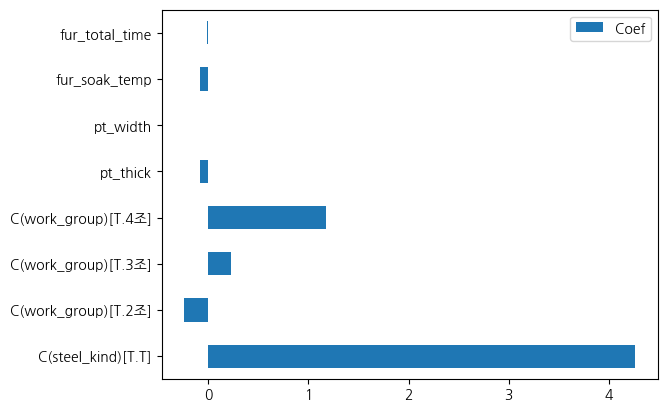

In [ ]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")
# df_logistic_coef.plot.barh(y = "Coef", figsize=(10,6))

> 해석
- 예상과 동일하게 steel_kind가 변수 중요도가 높은 것으로 나왔지만 work_group이 높게 나온 것에 대해서는 예상과 다른 것으로 생각보다 중요도가 높은 편에 속하진 않기에 괜찮을 것으로 판단됨

### decision tree

In [ ]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

# 다른 방식(.dot -> .png 형식, 출력화면에 맞는)으로 Tree 출력
from subprocess import call
from IPython.display import Image

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,1,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,1,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,1,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,1,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,1,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,프랑스,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
996,1,영국,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
997,1,미국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
998,1,영국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


In [ ]:
df_raw_x = df.drop('scale', axis=1)
df_raw_y = df['scale']

In [ ]:
df_raw_dummy = pd.get_dummies(df_raw_x)

In [ ]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant

In [ ]:
df_raw_dummy

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,...,fur_no_2호기,fur_no_3호기,fur_input_row_1열,fur_input_row_2열,rolling_method_CR(제어압연),rolling_method_TMCP(온도제어),work_group_1조,work_group_2조,work_group_3조,work_group_4조
0,32,3700,15100,1144,116,1133,59,259,1133,934,...,0,0,1,0,0,1,1,0,0,0
1,32,3700,15100,1144,122,1135,53,238,1135,937,...,0,0,0,1,0,1,1,0,0,0
2,33,3600,19200,1129,116,1121,55,258,1121,889,...,1,0,1,0,0,1,1,0,0,0
3,33,3600,19200,1152,125,1127,68,266,1127,885,...,1,0,0,1,0,1,1,0,0,0
4,38,3100,13300,1140,134,1128,48,246,1128,873,...,0,1,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,19,3400,41500,1142,55,1151,86,203,1151,948,...,0,0,0,1,1,0,0,0,0,1
996,19,3400,41500,1142,55,1151,86,209,1151,948,...,0,0,0,1,1,0,0,0,0,1
997,17,3400,43700,1169,65,1163,77,227,1163,948,...,1,0,0,1,1,0,0,0,0,1
998,17,3400,43700,1169,65,1163,77,204,1163,948,...,1,0,0,1,1,0,0,0,0,1


> 해석
- 처음 drop한 이외에 설명변수끼리의 상관성을 비교하는 다중공선성을 해결하는 과정이며, VIF가 10이 넘어가는 변수를 하나씩 지워가면 지움으로서 다른 변수들의 VIF가 변화하며 다중공선성 문제를 해결하였다

In [ ]:
# 53 Page
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_xx = df_raw_dummy.drop(['work_group_4조','spec_country_영국','fur_soak_temp','rolling_method_TMCP(온도제어)','hsb_적용','steel_kind_T','steel_kind_C'], axis = 1)

# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_raw_dummy)
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variable,VIF
0,const,0.00
2,pt_width,2.00
4,fur_heat_temp,3.86
10,rolling_temp,3.86
7,fur_soak_time,4.00
5,fur_heat_time,4.49
11,descaling_count,5.08
8,fur_total_time,6.67
3,pt_length,7.42
1,pt_thick,8.45


In [ ]:
# 53 Page
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_xx = df_raw_dummy.drop(['work_group_4조','spec_country_일본','steel_kind_T','hsb_미적용','fur_soak_temp','rolling_method_TMCP(온도제어)','fur_input_row_2열','fur_no_3호기','steel_kind_C'], axis = 1)

# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_xx)
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
20,fur_input_row_1열,1.02
17,hsb_적용,1.03
18,fur_no_1호기,1.40
19,fur_no_2호기,1.40
12,spec_country_독일,1.73
11,spec_country_공통,1.75
16,spec_country_한국,1.78
24,work_group_3조,1.80
15,spec_country_프랑스,1.83
2,pt_width,1.85


In [ ]:
# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_train_xx, df_raw_y, test_size = 0.3)

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (992, 18)
분할 후 설명변수 데이터 :Train (694, 24)   Test (298, 24)


- 모델링 해석
- 의사결정 나무의 기본 정확도가 높은 것으로 보아 기본적으로 결측값이 없었고 충분히 이상치라고 할만한 값을 제거하여 정제가 잘 되었기 때문에 모델 성능이 높은 것으로 보임

In [ ]:
tree_uncust = DecisionTreeClassifier( )
tree_uncust.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncust.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.993


In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경.
para_depth = [depth for depth in range(3, 12)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [ ]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,3,0.955,0.970
1,4,0.961,0.977
2,5,0.961,0.977
3,6,0.987,0.997
4,7,0.987,0.997
5,8,0.997,0.997
6,9,0.999,0.993
7,10,0.999,0.997
8,11,1.000,0.993


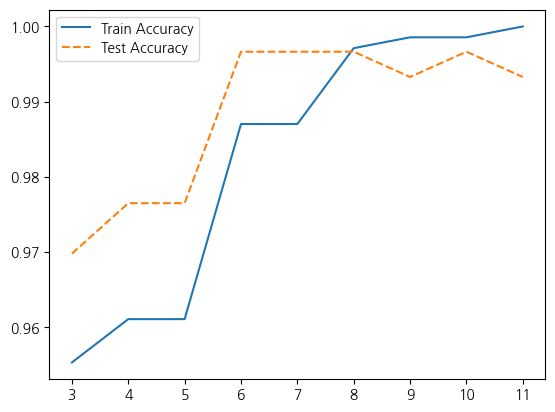

In [ ]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

- depth : 10
- 대원칙인 testaccuracy가 가장 높은 depth를 선택하는게 맞으나 depth가 특정 수치 넘으면 과적합이 발생할 수 있기 때문에 적당한 depth를 선택해야하나 깊이가 10정도는 과적합의 기준은 안넘을 것으로 판단하여 선택

In [ ]:
# 변수명 저장
v_feature_name = df_train_x.columns

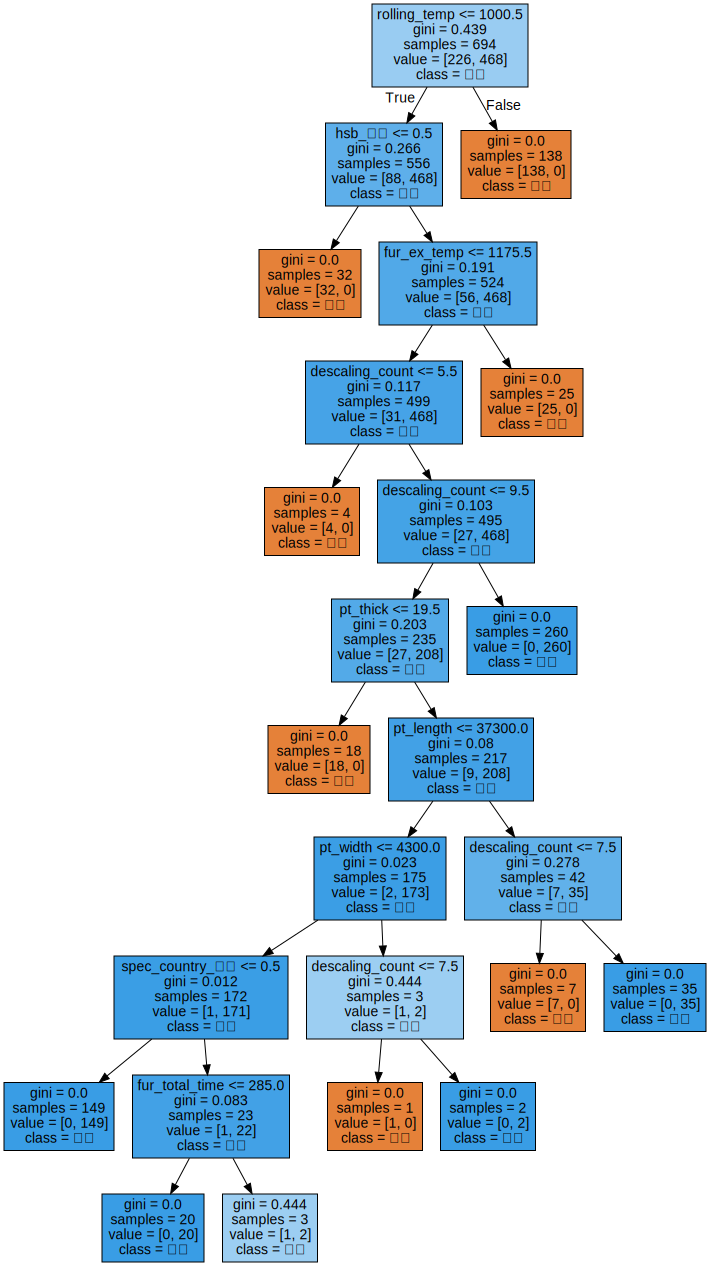

In [ ]:
# max_depth, 깊이: 모델
tree_low = DecisionTreeClassifier(max_depth = 10)
tree_low.fit(df_train_x, df_train_y)
# 트리 모델을 tree_low.dot 파일로 저장. (목표변수 레이블 지정(class_names):0-Good,1-Bad)
export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["양품", "불량"],
                feature_names = v_feature_name, impurity = True, filled = True)

# 트리 결과 시각화
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수
para_split = [n_split * 10 for n_split in range(2, 16)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth=10)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [ ]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.997,0.997
1,30,0.997,0.997
2,40,0.997,0.997
3,50,0.987,0.997
4,60,0.987,0.997
5,70,0.987,0.997
6,80,0.987,0.997
7,90,0.987,0.997
8,100,0.987,0.997
9,110,0.987,0.997


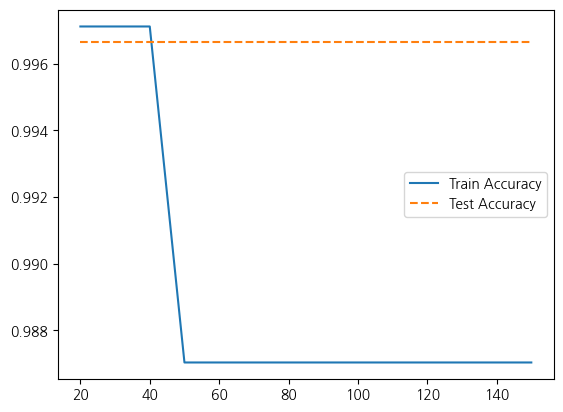

In [ ]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

- split : 30
- split의 최소 기준이 어떠한 수치여도 동일한 정확도가 나오는 것으로 보아 split은 이번 모델에서 의미가 없는 것으로 판단하여 적당한 수치의 30으로 선택

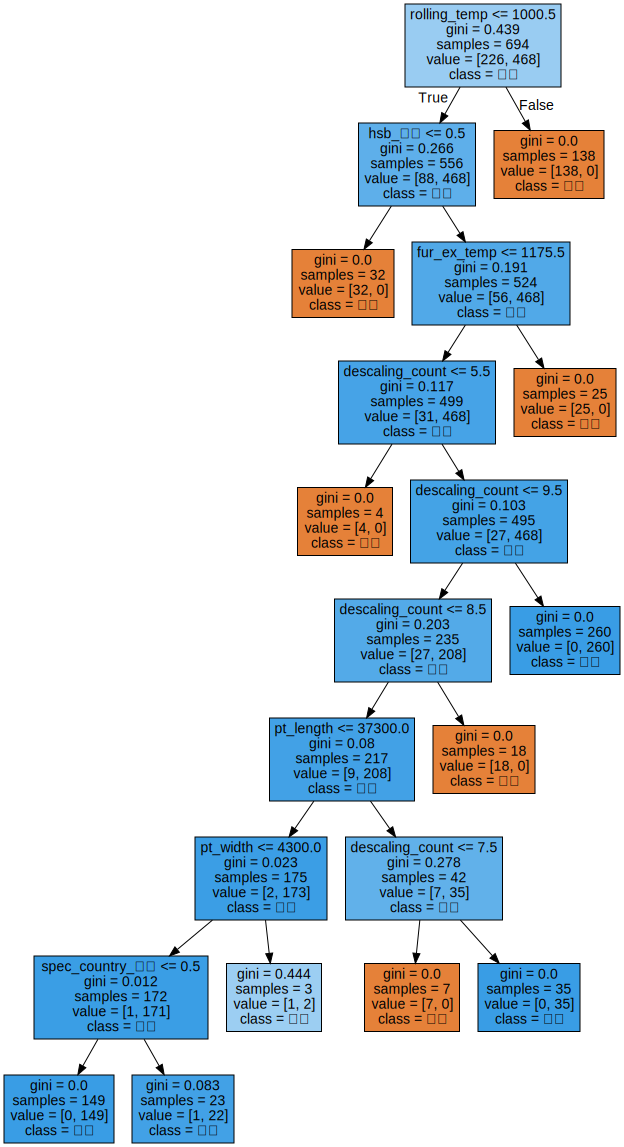

In [ ]:
# 분리 노드의 최소 자료 수: 모델
tree_low = DecisionTreeClassifier(max_depth=10, min_samples_split=30)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["양품", "불량"],
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 노드 최소 자료 수.
para_leaf = [n_leaf * 2 for n_leaf in range(5,16)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split=30, \
		max_depth=10)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [ ]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.981,0.990
1,12,0.981,0.990
2,14,0.981,0.990
3,16,0.981,0.990
4,18,0.981,0.990
5,20,0.957,0.970
6,22,0.957,0.970
7,24,0.957,0.970
8,26,0.951,0.963
9,28,0.951,0.963


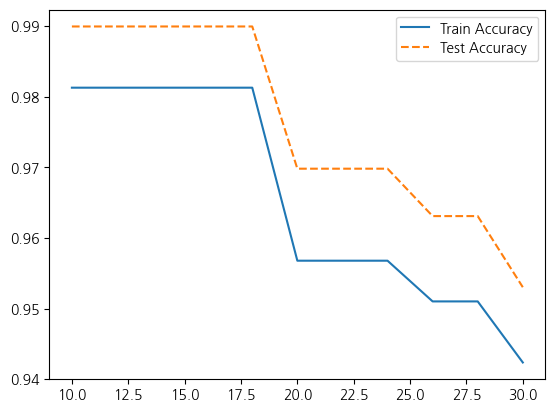

In [ ]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

- leaf : 10
- leaf를 가지는 최소 기준치가 높아질수록 모든 면에서 정확도가 떨어지는 것이 보여 10이 적당할 것으로 판단하여 선택

In [ ]:
# 최종모델
tree_final = DecisionTreeClassifier(max_depth=10, min_samples_split=30, min_samples_leaf=10)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=30)

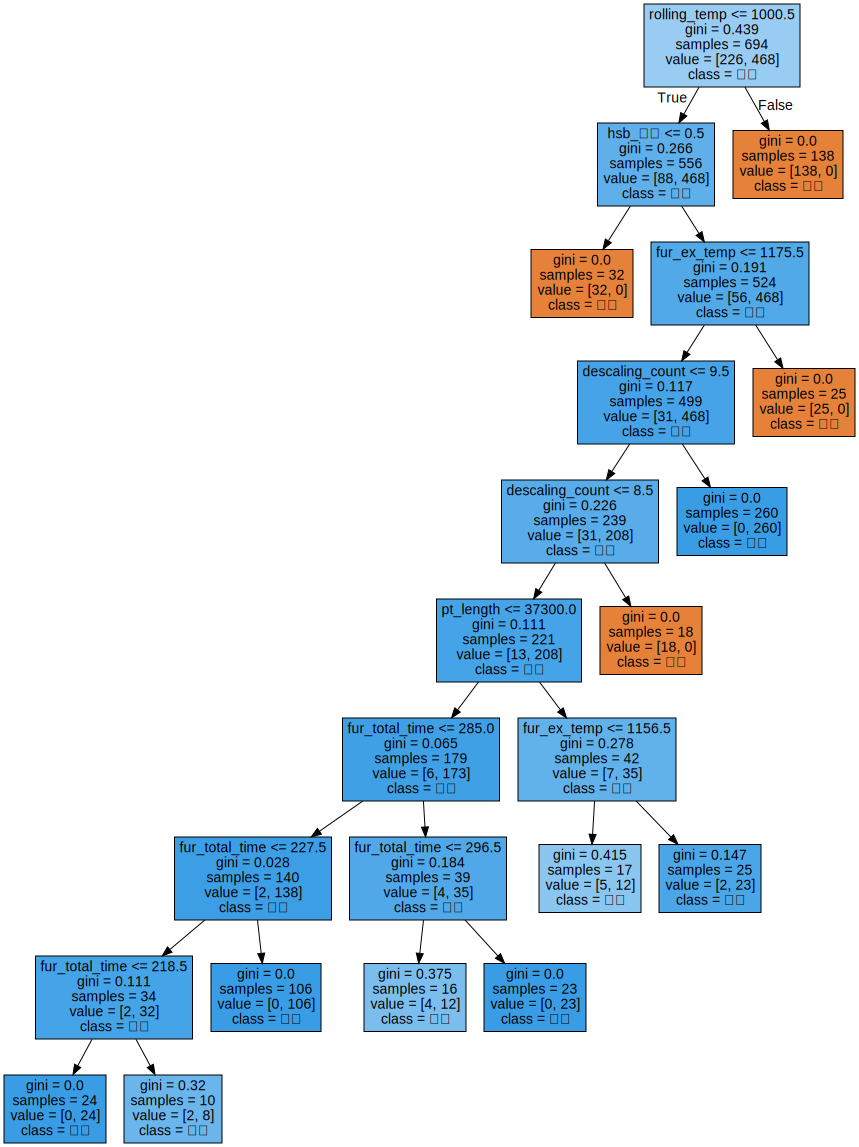

In [ ]:
# tree_final.dot으로 결과 저장
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["양품", "불량"],
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Test Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.981
Test Accuracy: 0.990

Test Confusion matrix: 
[[ 79   3]
 [  0 216]]
              precision    recall  f1-score   support

           0      1.000     0.963     0.981        82
           1      0.986     1.000     0.993       216

    accuracy                          0.990       298
   macro avg      0.993     0.982     0.987       298
weighted avg      0.990     0.990     0.990       298



> 해석
- Decision tree의 최적의 파라미터를 찾아 모델을 평가한 결과 모든 면에서 성능은 조금 떨어졌으나 최소한의 과적합 방지를 통해 모델의 신뢰성을 높이는 것으로 선택함

In [ ]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
8,rolling_temp,0.550
16,hsb_적용,0.169
7,fur_ex_temp,0.150
9,descaling_count,0.118
6,fur_total_time,0.008
2,pt_length,0.004
0,pt_thick,0.000
15,spec_country_한국,0.000
22,work_group_2조,0.000
21,work_group_1조,0.000


Text(0, 0.5, '설명변수')

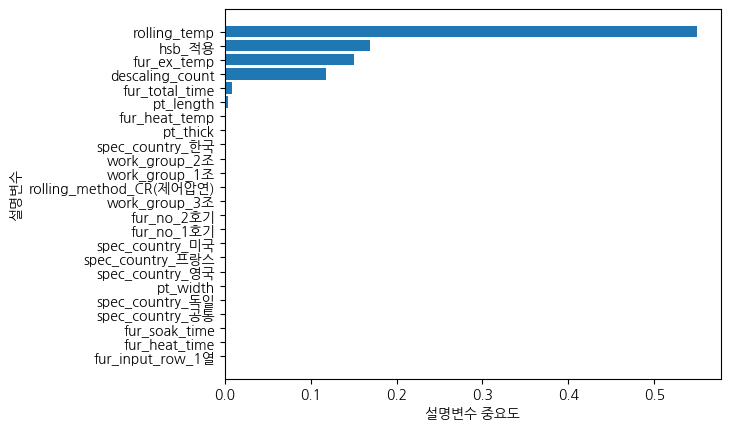

In [ ]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림.
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

> 해석
- 처음 변수에서 중요도가 높을 것이라고 생각했던 변수에 비해 중요도 그래프에서 적은 개수를 보여주고 있지만 온도와 hsb, descaling_count가 높은 중요도를 가질 것이라고 예측했던 부분에 대해서는 좋은 모델이 나온 것으로 판단됨

### random Forest

In [ ]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
#분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant

In [ ]:
df_raw_x = df.drop('scale', axis=1)
df_raw_y = df['scale']

In [ ]:
df_raw_dummy = pd.get_dummies(df_raw_x)

In [ ]:
# 53 Page
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가

# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_raw_dummy)
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variable,VIF
0,const,0.00
2,pt_width,2.00
4,fur_heat_temp,3.86
10,rolling_temp,3.86
7,fur_soak_time,4.00
5,fur_heat_time,4.49
11,descaling_count,5.08
8,fur_total_time,6.67
3,pt_length,7.42
1,pt_thick,8.45


In [ ]:
# 53 Page
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_xx = df_raw_dummy.drop(['work_group_4조','spec_country_일본','steel_kind_T','hsb_미적용','fur_soak_temp','rolling_method_TMCP(온도제어)','fur_input_row_2열','fur_no_3호기','steel_kind_C'], axis = 1)

# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_xx)
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
20,fur_input_row_1열,1.02
17,hsb_적용,1.03
18,fur_no_1호기,1.40
19,fur_no_2호기,1.40
12,spec_country_독일,1.73
11,spec_country_공통,1.75
16,spec_country_한국,1.78
24,work_group_3조,1.80
15,spec_country_프랑스,1.83
2,pt_width,1.85


In [ ]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_train_xx, df_raw_y, test_size = 0.3)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (694, 24)
train data Y size : (694,)
test data X size : (298, 24)
test data Y size : (298,)


> 모델링 해석
- 대부분 tree 모델이 이 데이터프레임에 대해 높은 성능을 보여주는 것으로 보인다

In [ ]:
# 랜덤 포레스트 모델 생성: RandomForestClassifier
rf_uncust = RandomForestClassifier()
rf_uncust.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncust.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(rf_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.950


In [ ]:
# 실행옵션 확인
print(rf_uncust.get_params().keys())
print(rf_uncust.get_params().values())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_values([True, 0.0, None, 'gini', None, 'sqrt', None, None, 0.0, 1, 2, 0.0, 100, None, False, None, 0, False])


In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1, 32)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

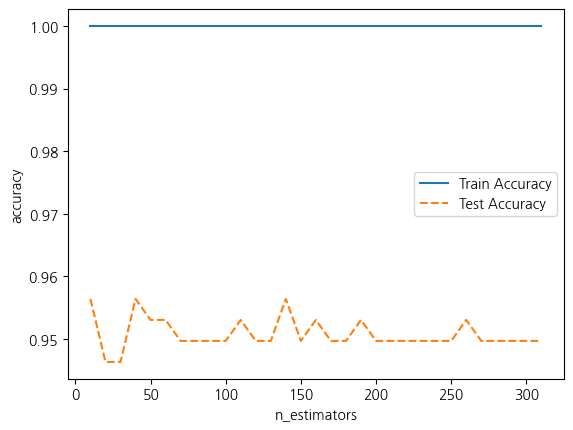

In [ ]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

In [ ]:
# 모델 정확도 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,1.0,0.956
1,20,1.0,0.946
2,30,1.0,0.946
3,40,1.0,0.956
4,50,1.0,0.953
5,60,1.0,0.953
6,70,1.0,0.950
7,80,1.0,0.950
8,90,1.0,0.950
9,100,1.0,0.950


In [ ]:
# error 저장 리스트
oob_error = []

for v_n_estimator in range(5, 121):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

Text(0.5, 0, 'n_estimators')

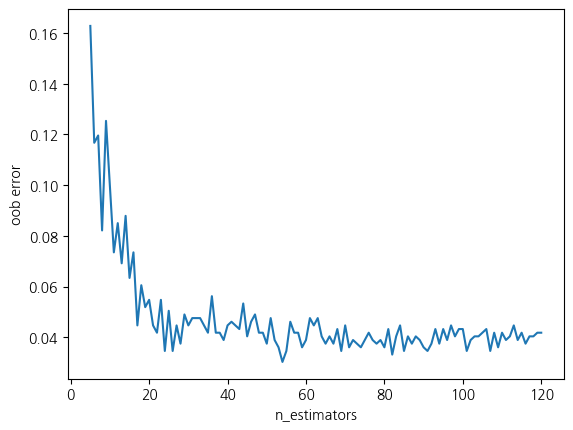

In [ ]:
# 그래프로 표현
plt.plot(range(5, 121), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

> 해석
- testaccuracy가 높으면서 과적합이 일어나지 않을 트리의 모델의 수인 70을 선택

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(3, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators=70)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,3,0.922,0.913
1,4,0.954,0.933
2,5,0.958,0.946
3,6,0.970,0.943
4,7,0.973,0.950
5,8,0.976,0.950
6,9,0.996,0.950
7,10,0.997,0.950


- max_depth : 9
- testaccuracy 또한 중요하지만 판단하에 train을 통해 학습한 데이터의 정확도도 중요하기 때문에 train이 많이 떨어지지 않는 선에서 깊이를 9로 선택

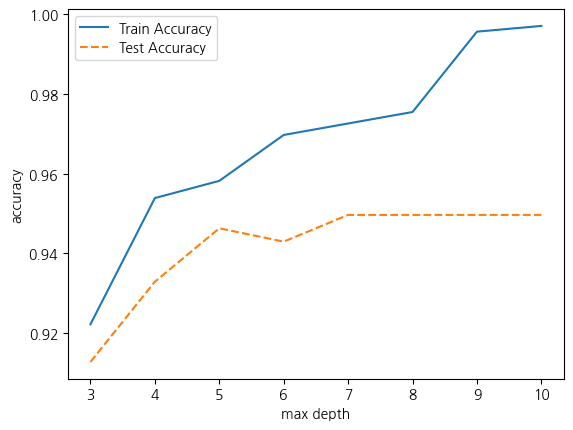

In [ ]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

In [ ]:
# 참조:적정 자료 수 검토:Train Data 자료 수
print("전체 자료 = ", df_train_x.shape[0],"개")
print("전체 자료의 1% = ", df_train_x.shape[0] * 0.01,"개")

전체 자료 =  694 개
전체 자료의 1% =  6.94 개


In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수.
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth=9,
                                n_estimators=70)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.977,0.95
1,20,0.973,0.95
2,30,0.967,0.95
3,40,0.964,0.95
4,50,0.964,0.95
5,60,0.964,0.95
6,70,0.964,0.95
7,80,0.964,0.95
8,90,0.958,0.95
9,100,0.957,0.94


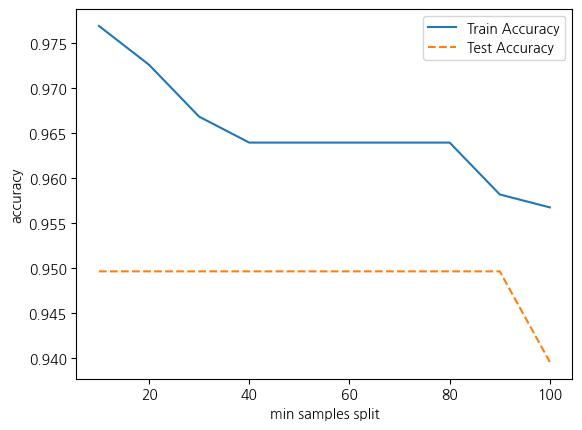

In [ ]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

> 해석
- split의 경우 그래프를 보고 기본적으로 제공되는 디폴트 값을 사용해도 괜찮을 거라 판단함

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,
                                max_depth=9, n_estimators=70)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.957,0.940
1,10,0.932,0.923
2,15,0.922,0.909
3,20,0.918,0.899
4,25,0.892,0.879
5,30,0.883,0.876
6,35,0.875,0.872
7,40,0.875,0.879
8,45,0.875,0.872
9,50,0.869,0.866


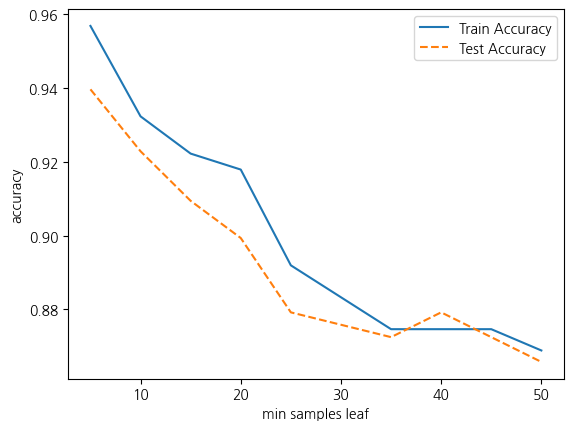

In [ ]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

In [ ]:
# 최종 모델
rf_final = RandomForestClassifier(min_samples_leaf=5, max_depth=9, n_estimators=70)
rf_final.fit(df_train_x, df_train_y)
# 평가
y_pred = rf_final.predict(df_test_x)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.964
Accuracy on test set: 0.946

Confusion matrix: 
[[ 78  16]
 [  0 204]]
              precision    recall  f1-score   support

           0      1.000     0.830     0.907        94
           1      0.927     1.000     0.962       204

    accuracy                          0.946       298
   macro avg      0.964     0.915     0.935       298
weighted avg      0.950     0.946     0.945       298



> 해석
- 최적 파라미터를 각각 찾아서 최종모델을 선정했을 때 과적합이 없고 96%, 93%로 높은 정확도를 보이는 것으로 이 모델의 최적의 파라미터를 선택한 것으로 판단

In [ ]:
# 변수명
v_feature_names = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_names
df_importance ["Importance"] = rf_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
8,rolling_temp,0.376
7,fur_ex_temp,0.131
16,hsb_적용,0.102
0,pt_thick,0.064
1,pt_width,0.062
3,fur_heat_temp,0.062
2,pt_length,0.052
9,descaling_count,0.044
5,fur_soak_time,0.027
6,fur_total_time,0.020


Text(0, 0.5, '설명변수')

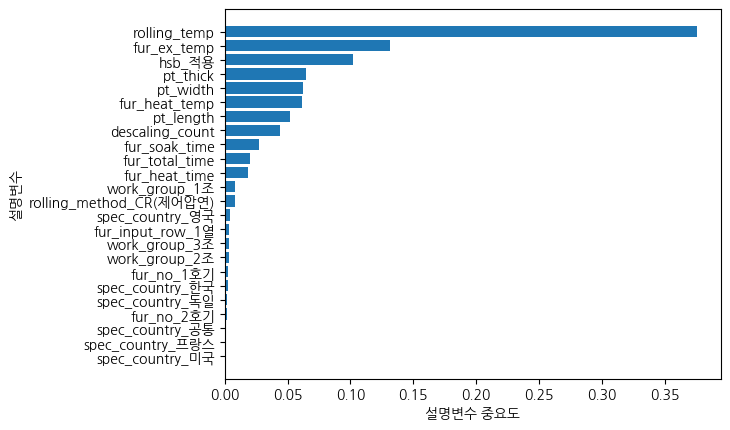

In [ ]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

> 해석
- 기본적으로 모든 변수가 약간의 중요도를 가지고 있으며 temp 변수들이 높은 중요도를 가지고 있는 것으로 보아 후판을 만드는데 있어서 온도 변수가 중요한 것으로 판단됨

### gradientBoosting

In [ ]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_train_xx, df_raw_y, test_size = 0.3)

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (992, 18)
분할 후 설명변수 데이터 :Train (694, 24)   Test (298, 24)


> 해석
- tree 모델 중에서 가장 성능이 좋은 모델인 GB tree는 기본 파라미터를 적용하여도 가장 높은 성능이 나오는 것으로 보임

In [ ]:
# 그래디언트 부스팅 모델 생성: GradientBoostingClassifier
gb_uncust = GradientBoostingClassifier()
gb_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncust.score (df_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncust.score (df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [ ]:
# 실행옵션 확인
print(gb_uncust.get_params().keys())
print(gb_uncust.get_params().values())

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values([0.0, 'friedman_mse', None, 0.1, 'log_loss', 3, None, None, 0.0, 1, 2, 0.0, 100, None, None, 1.0, 0.0001, 0.1, 0, False])


#### learning rate

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# learning_rate 학습률 변경
para_lr = [lr * 0.1 for lr in range(1, 10)]
# para_lr = [lr * 0.02 for lr in range(1, 20)]   # 민감하게 변화하면 0.02 간격으로 확인

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

In [ ]:
# LearningRate별 정확도
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,1.0,1.000
1,0.2,1.0,1.000
2,0.3,1.0,1.000
3,0.4,1.0,1.000
4,0.5,1.0,1.000
5,0.6,1.0,1.000
6,0.7,1.0,1.000
7,0.8,1.0,0.993
8,0.9,1.0,1.000


- learning rate : 0.1

In [ ]:
para_lr

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

In [ ]:
# LearningRate별 정확도
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,1.0,1.000
1,0.2,1.0,1.000
2,0.3,1.0,1.000
3,0.4,1.0,1.000
4,0.5,1.0,1.000
5,0.6,1.0,1.000
6,0.7,1.0,1.000
7,0.8,1.0,0.993
8,0.9,1.0,1.000


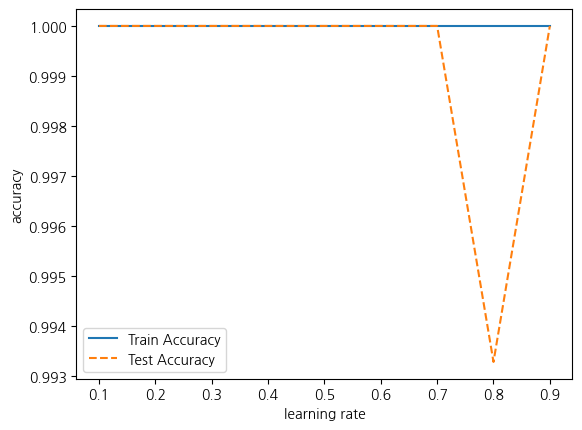

In [ ]:
# LearningRate별 정확도 그래프 확인
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("learning rate")
plt.legend()

#### n_estimators

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, learning_rate=0.1)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [ ]:
para_n_tree

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

In [ ]:
# n_estimators별 정확도
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.957,0.966
1,20,0.964,0.970
2,30,0.974,0.977
3,40,0.984,0.983
4,50,0.999,0.993
5,60,0.999,1.000
6,70,0.999,1.000
7,80,0.999,1.000
8,90,1.000,1.000
9,100,1.000,1.000


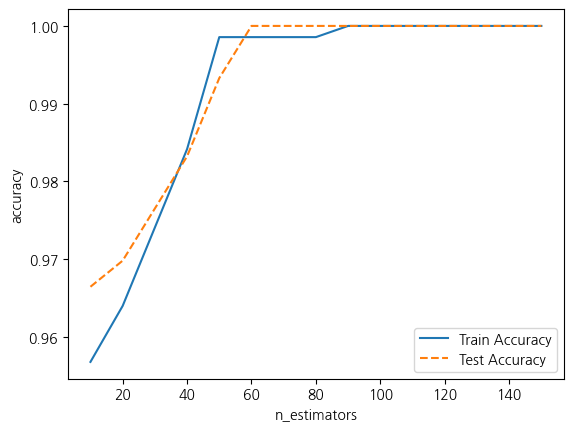

In [ ]:
# 정확도를 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()

- n_estimators : 100

#### max_depth

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경. 1~10
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,
                            n_estimators=100, learning_rate=0.1)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [ ]:
para_depth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
# max_depth별 정확도
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.964,0.970
1,2,0.993,0.993
2,3,1.000,1.000
3,4,1.000,1.000
4,5,1.000,1.000
5,6,1.000,1.000
6,7,1.000,1.000
7,8,1.000,1.000
8,9,1.000,1.000
9,10,1.000,0.993


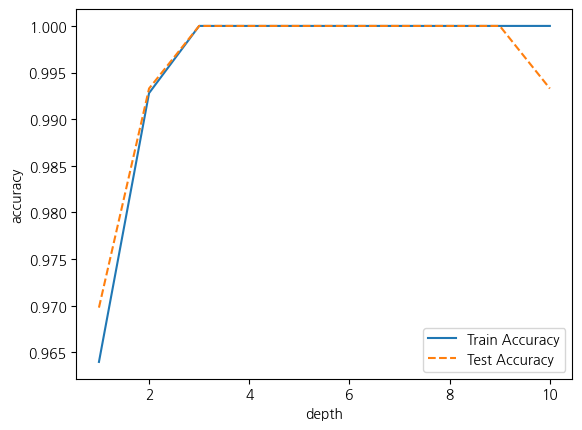

In [ ]:
# 정확도를 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("depth")
plt.legend()

- max_depth : 5

#### min_sample_split

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수. 20~100
para_split = [n_split * 10 for n_split in range(2, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split,
                                    max_depth=5, n_estimators=80, learning_rate=0.1)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [ ]:
para_split

[20, 30, 40, 50, 60, 70, 80, 90, 100]

In [ ]:
# min_samples_leaf별 정확도
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,1.0,1.0
1,30,1.0,1.0
2,40,1.0,1.0
3,50,1.0,1.0
4,60,1.0,1.0
5,70,1.0,1.0
6,80,1.0,1.0
7,90,1.0,1.0
8,100,1.0,1.0


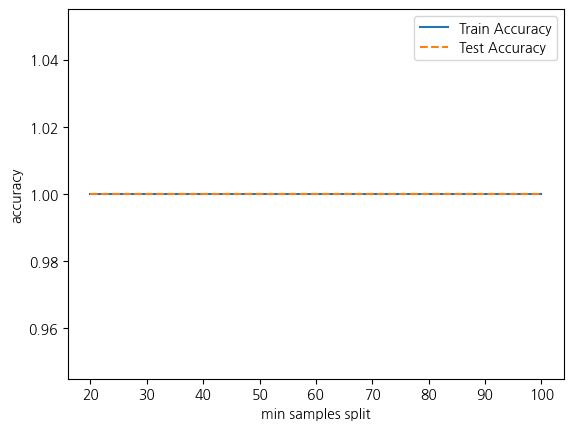

In [ ]:
# 정확도를 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples split")
plt.legend()

- leaf : 변화가 없기 때문에 선택 x

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 노드 최소 자료 수. 5~50
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf,
                                     max_depth=6, n_estimators=100, learning_rate=0.1)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [ ]:
para_leaf

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [ ]:
# min_samples_leaf별 정확도
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,1.000,1.000
1,10,1.000,0.990
2,15,1.000,0.990
3,20,1.000,0.990
4,25,1.000,0.990
5,30,0.994,0.919
6,35,0.994,0.919
7,40,0.986,0.913
8,45,0.983,0.909
9,50,0.978,0.919


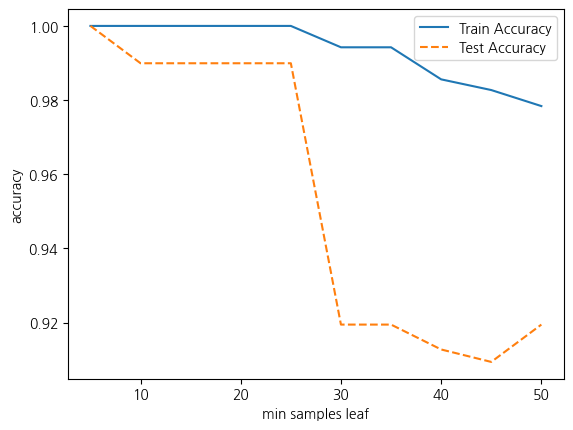

In [ ]:
# 정확도를 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples leaf")
plt.legend()

#### 최종모델

In [ ]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf=5, max_depth=5, n_estimators=100, learning_rate=0.1)
gb_final.fit(df_train_x, df_train_y)
# 예측
y_pred = gb_final.predict(df_test_x)

# train 모델 정확도
print("Train Accuracy: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits=3))

Train Accuracy: 1.000
Test Accuracy: 1.000

Test Confusion matrix: 
[[ 83   0]
 [  0 215]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        83
           1      1.000     1.000     1.000       215

    accuracy                          1.000       298
   macro avg      1.000     1.000     1.000       298
weighted avg      1.000     1.000     1.000       298



> 해석
- 최적의 파라미터와 기본 디폴트 파라미터와 비교해 보았을 때 성능 변화가 없는 것으로 보아 이 모델에서의 최고치 성능을 보여주고 있는 것으로 판단

#### 설명변수 중요도

In [ ]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_name
df_importance ["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
8,rolling_temp,0.539
7,fur_ex_temp,0.155
16,hsb_적용,0.144
9,descaling_count,0.098
0,pt_thick,0.058
1,pt_width,0.002
6,fur_total_time,0.001
2,pt_length,0.001
4,fur_heat_time,0.000
5,fur_soak_time,0.000


- 중요 변수 : rolling_temp, hsb_적용, fur_ex_temp	,descaling_count, pt_thick

Text(0, 0.5, '설명변수')

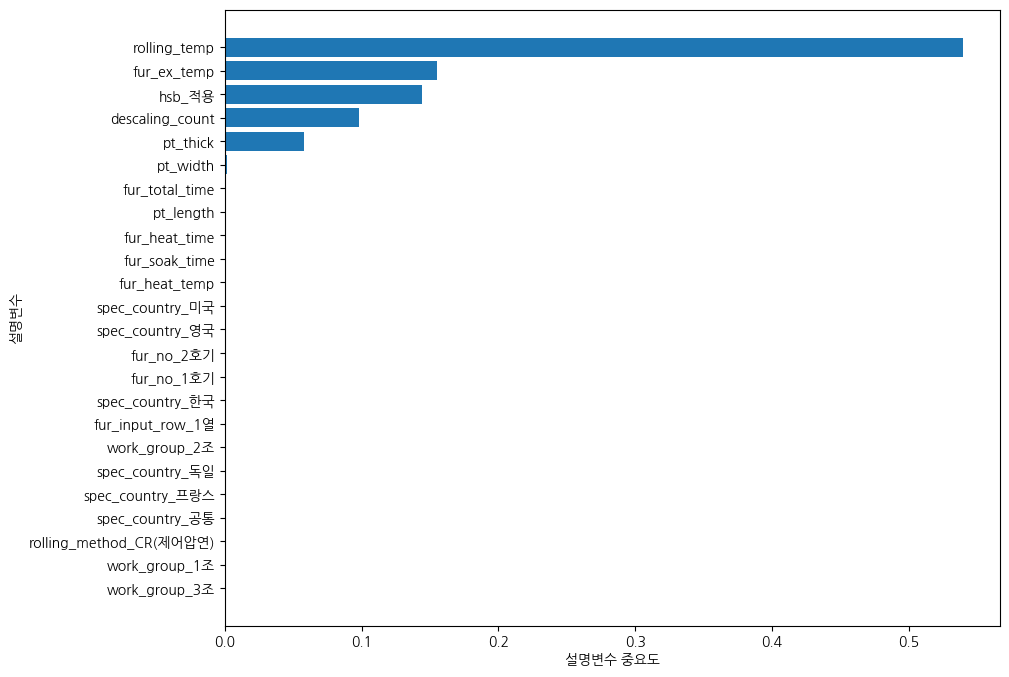

In [ ]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
fig, ax = plt.subplots(figsize=(10, 8))

df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

> 해석
- 지금까지 모델 중 모든 모델이 변수 중요도에서 temp 관련 변수들과 hsb가 높은 중요도로 포함되어 있으며 GB 모델에서는 후판의 규격과 관련된 변수가 높은 중요도를 보여주고 있음으로 규격의 기준도 후판의 양품/불량의 영향을 주는 것으로 판단

### SVM

In [ ]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 SVM
from sklearn.svm import SVC
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# 목표변수/설명변수 분리
df_raw_x = df.drop("scale", axis = 1, inplace = False)
df_raw_y = df["scale"]

display("설명변수:", df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


'목표변수:'

0    1
1    1
2    1
3    1
4    1
Name: scale, dtype: int64

In [ ]:
# 범주형 변수 선택 : select_dtypes="object"
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

# get_dummies: 범주형 변수에 대한 더미변환
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,spec_country,steel_kind,hsb,fur_no,fur_input_row,rolling_method,work_group
0,미국,T,적용,1호기,1열,TMCP(온도제어),1조
1,미국,T,적용,1호기,2열,TMCP(온도제어),1조
2,영국,T,적용,2호기,1열,TMCP(온도제어),1조
3,영국,T,적용,2호기,2열,TMCP(온도제어),1조
4,프랑스,T,적용,3호기,1열,TMCP(온도제어),1조


'Dummy 변환 후:'

,spec_country_공통,spec_country_독일,spec_country_미국,spec_country_영국,spec_country_일본,spec_country_프랑스,spec_country_한국,steel_kind_C,steel_kind_T,hsb_미적용,...,fur_no_2호기,fur_no_3호기,fur_input_row_1열,fur_input_row_2열,rolling_method_CR(제어압연),rolling_method_TMCP(온도제어),work_group_1조,work_group_2조,work_group_3조,work_group_4조
0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,1,1,0,0,1,1,0,0,0


In [ ]:
# 연속형 변수 선택 : select_dtypes="object" 제외
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")
# df_raw_x_num.head()

# 변수명 저장
v_feature_names = df_raw_x_num.columns

# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
0,32,3700,15100,1144,116,1133,59,259,1133,934,8
1,32,3700,15100,1144,122,1135,53,238,1135,937,8
2,33,3600,19200,1129,116,1121,55,258,1121,889,8
3,33,3600,19200,1152,125,1127,68,266,1127,885,8
4,38,3100,13300,1140,134,1128,48,246,1128,873,8


'Scale 변환 후:'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
0,0.310546,1.757046,-1.577131,-0.630959,1.136704,-1.042464,-0.618748,0.530243,-1.042464,-0.095272,-0.356839
1,0.310546,1.757046,-1.577131,-0.630959,1.363975,-0.926816,-0.909303,-0.018682,-0.926816,-0.048190,-0.356839
2,0.367051,1.553900,-1.280736,-1.338097,1.136704,-1.736351,-0.812452,0.504104,-1.736351,-0.801510,-0.356839
3,0.367051,1.553900,-1.280736,-0.253819,1.477611,-1.389407,-0.182915,0.713218,-1.389407,-0.864287,-0.356839
4,0.649573,0.538172,-1.707256,-0.819529,1.818519,-1.331583,-1.151433,0.190432,-1.331583,-1.052617,-0.356839


In [ ]:
# 설명변수 데이터 결합: scale된 연속형 + dummy된 범주형
df_x_converted = pd.concat([df_x_scaled.reset_index(),df_x_dummy.reset_index()], axis = 1)

display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


'Scale/Dummy 변환 후:'

,index,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,...,fur_no_2호기,fur_no_3호기,fur_input_row_1열,fur_input_row_2열,rolling_method_CR(제어압연),rolling_method_TMCP(온도제어),work_group_1조,work_group_2조,work_group_3조,work_group_4조
0,0,0.310546,1.757046,-1.577131,-0.630959,1.136704,-1.042464,-0.618748,0.530243,-1.042464,...,0,0,1,0,0,1,1,0,0,0
1,1,0.310546,1.757046,-1.577131,-0.630959,1.363975,-0.926816,-0.909303,-0.018682,-0.926816,...,0,0,0,1,0,1,1,0,0,0
2,2,0.367051,1.553900,-1.280736,-1.338097,1.136704,-1.736351,-0.812452,0.504104,-1.736351,...,1,0,1,0,0,1,1,0,0,0
3,3,0.367051,1.553900,-1.280736,-0.253819,1.477611,-1.389407,-0.182915,0.713218,-1.389407,...,1,0,0,1,0,1,1,0,0,0
4,4,0.649573,0.538172,-1.707256,-0.819529,1.818519,-1.331583,-1.151433,0.190432,-1.331583,...,0,1,1,0,0,1,1,0,0,0


In [ ]:
df_x_converted.isnull().sum()

index                        0
pt_thick                     0
pt_width                     0
pt_length                    0
fur_heat_temp                0
fur_heat_time                0
fur_soak_temp                0
fur_soak_time                0
fur_total_time               0
fur_ex_temp                  0
rolling_temp                 0
descaling_count              0
index                        0
spec_country_공통              0
spec_country_독일              0
spec_country_미국              0
spec_country_영국              0
spec_country_일본              0
spec_country_프랑스             0
spec_country_한국              0
steel_kind_C                 0
steel_kind_T                 0
hsb_미적용                      0
hsb_적용                       0
fur_no_1호기                   0
fur_no_2호기                   0
fur_no_3호기                   0
fur_input_row_1열             0
fur_input_row_2열             0
rolling_method_CR(제어압연)      0
rolling_method_TMCP(온도제어)    0
work_group_1조                0
work_gro

In [ ]:
# 변환된 설명변수 데이터 사용:df_x_converted
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

print("분할된 Train Data: {}".format(df_train_x.shape))
print("분할된 Test Data: {}".format(df_test_x.shape))

분할된 Train Data: (694, 35)
분할된 Test Data: (298, 35)


- SVM의 가장 기본적은 커널 함수인 RBF가 디폴트 커널
- 주요 파라미터 cost(C), gamma가 있음

> cost(C)
- C가 너무 높을 경우 training data에만 적합하고 새로운 데이터에 적응하지 못해 일반화에 실패한 과적합이 됨
- 반대로 C가 너무 낮으면 일반적인 경계를 찾기는 하나 분류 정확도가 거의 낮다고 봐야함

> gamma
- 기울기를 뜻함
- 클수록 완만한 언덕이 되고 작을수록 경사가 큰 언덕이 됨

In [ ]:
svm_uncust = SVC()
svm_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Train Accuracy : {:.3f}".format(svm_uncust.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}".format(svm_uncust.score(df_test_x, df_test_y)))

Train Accuracy : 0.692
Test Accuracy : 0.685


In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
# para_c = [0.1 * c for c in range(1, 13)] )] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [ ]:
# Cost별 정확도
df_accuracy_c.round(3)

,Cost,TrainAccuracy,TestAccuracy
0,0.01,0.692,0.685
1,0.10,0.692,0.685
2,1.00,0.692,0.685
3,10.00,0.692,0.685
4,100.00,0.739,0.728


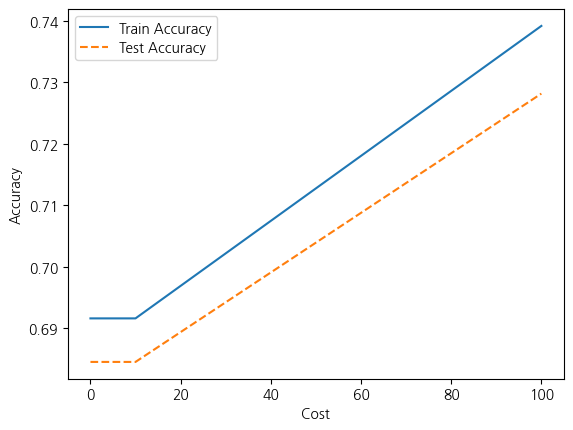

In [ ]:
# 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Cost")
plt.legend()

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_c = [0.1 * c for c in range(1, 13)] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [ ]:
# Cost별 정확도
df_accuracy_c.round(3)

,Cost,TrainAccuracy,TestAccuracy
0,0.1,0.692,0.685
1,0.2,0.692,0.685
2,0.3,0.692,0.685
3,0.4,0.692,0.685
4,0.5,0.692,0.685
5,0.6,0.692,0.685
6,0.7,0.692,0.685
7,0.8,0.692,0.685
8,0.9,0.692,0.685
9,1.0,0.692,0.685


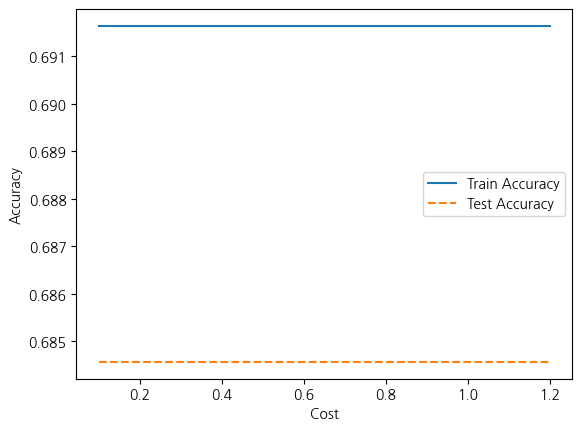

In [ ]:
# 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Cost")
plt.legend()

- gamma

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_gamma = [10 **gamma for gamma in range(-2, 3)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
# para_gamma = [0.1 * gamma for gamma in range(1, 11)]     # 0.1~1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.5)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [ ]:
# Gamma별 정확도
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.8631,0.8255
1,0.10,0.8775,0.7282
2,1.00,0.6916,0.6846
3,10.00,0.6916,0.6846
4,100.00,0.6916,0.6846


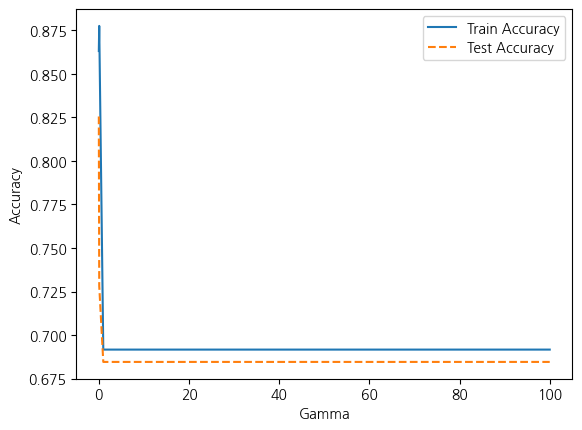

In [ ]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")  # X 축 범위 log 변환
plt.legend()

In [ ]:
# Gamma 미세 변화에 따른 모델 성능
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# para_gamma = [10 **gamma for gamma in range(-2, 3)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_gamma = [0.1 * gamma for gamma in range(1, 11)]     # 0.1~1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.5)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [ ]:
# Gamma별 정확도
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.1,0.8775,0.7282
1,0.2,0.7752,0.6846
2,0.3,0.7089,0.6846
3,0.4,0.6931,0.6846
4,0.5,0.6916,0.6846
5,0.6,0.6916,0.6846
6,0.7,0.6916,0.6846
7,0.8,0.6916,0.6846
8,0.9,0.6916,0.6846
9,1.0,0.6916,0.6846


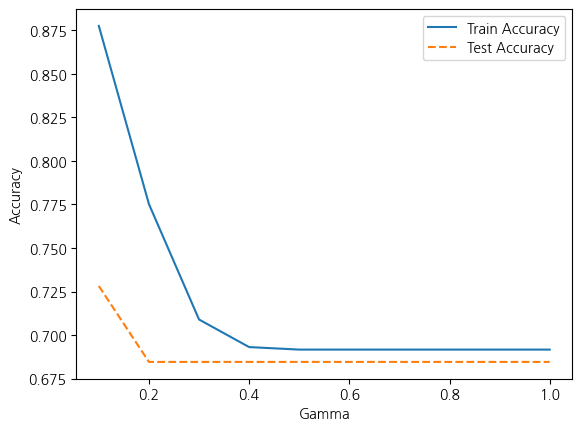

In [ ]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")  # X 축 범위 log 변환
plt.legend()

In [ ]:
svm_cust = SVC(C=0.5, gamma=0.1)
svm_cust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Train Accuracy : {:.3f}".format(svm_cust.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}".format(svm_cust.score(df_test_x, df_test_y)))

Train Accuracy : 0.878
Test Accuracy : 0.728


In [ ]:
svm_cust = SVC(C=0.7, gamma=0.1)
svm_cust.fit(df_train_x, df_train_y)
y_pred = knn_model.predict(df_test_x)
# train 데이터 정확도
print("Train Accuracy: {0:.3f}".format(svm_cust.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Test Accuracy: {0:.3f}\n".format(svm_cust.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits=3))

Train Accuracy: 0.929
Test Accuracy: 0.802

Test Confusion matrix: 
[[ 51  43]
 [ 11 193]]
              precision    recall  f1-score   support

           0      0.823     0.543     0.654        94
           1      0.818     0.946     0.877       204

    accuracy                          0.819       298
   macro avg      0.820     0.744     0.766       298
weighted avg      0.819     0.819     0.807       298



### KNN

In [ ]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# data
# 목표변수/설명변수 분리
df_raw_x = df.drop("scale", axis = 1, inplace = False)
df_raw_y = df["scale"]

display("설명변수:", df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


'목표변수:'

0    1
1    1
2    1
3    1
4    1
Name: scale, dtype: int64

In [ ]:
# 범주형 변수 선택 : select_dtypes="object"
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

# get_dummies: 범주형 변수에 대한 더미변환
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,spec_country,steel_kind,hsb,fur_no,fur_input_row,rolling_method,work_group
0,미국,T,적용,1호기,1열,TMCP(온도제어),1조
1,미국,T,적용,1호기,2열,TMCP(온도제어),1조
2,영국,T,적용,2호기,1열,TMCP(온도제어),1조
3,영국,T,적용,2호기,2열,TMCP(온도제어),1조
4,프랑스,T,적용,3호기,1열,TMCP(온도제어),1조


'Dummy 변환 후:'

,spec_country_공통,spec_country_독일,spec_country_미국,spec_country_영국,spec_country_일본,spec_country_프랑스,spec_country_한국,steel_kind_C,steel_kind_T,hsb_미적용,...,fur_no_2호기,fur_no_3호기,fur_input_row_1열,fur_input_row_2열,rolling_method_CR(제어압연),rolling_method_TMCP(온도제어),work_group_1조,work_group_2조,work_group_3조,work_group_4조
0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,1,1,0,0,1,1,0,0,0


> 해석
- 변수들의 scale 범위가 차이가 심하기 때문에 SVM,KNN, NN 등 모델은 모두 scaling을 통해 범위를 비슷하게 해주어 학습을 시켜야 좋은 모델을 만들 수 있다
- 연속형 변수들을 모두 평균이 0, 표준편차가 1이 되도록 표준스케일링을 통해 범위를 비슷하게 변환시킴

In [ ]:
# 연속형 변수 선택 : select_dtypes="object" 제외
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")
# df_raw_x_num.head()

# 변수명 저장
v_feature_names = df_raw_x_num.columns

# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
0,32,3700,15100,1144,116,1133,59,259,1133,934,8
1,32,3700,15100,1144,122,1135,53,238,1135,937,8
2,33,3600,19200,1129,116,1121,55,258,1121,889,8
3,33,3600,19200,1152,125,1127,68,266,1127,885,8
4,38,3100,13300,1140,134,1128,48,246,1128,873,8


'Scale 변환 후:'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
0,0.310546,1.757046,-1.577131,-0.630959,1.136704,-1.042464,-0.618748,0.530243,-1.042464,-0.095272,-0.356839
1,0.310546,1.757046,-1.577131,-0.630959,1.363975,-0.926816,-0.909303,-0.018682,-0.926816,-0.048190,-0.356839
2,0.367051,1.553900,-1.280736,-1.338097,1.136704,-1.736351,-0.812452,0.504104,-1.736351,-0.801510,-0.356839
3,0.367051,1.553900,-1.280736,-0.253819,1.477611,-1.389407,-0.182915,0.713218,-1.389407,-0.864287,-0.356839
4,0.649573,0.538172,-1.707256,-0.819529,1.818519,-1.331583,-1.151433,0.190432,-1.331583,-1.052617,-0.356839


In [ ]:
# 설명변수 데이터 결합: scale된 연속형 + dummy된 범주형
df_x_converted = pd.concat([df_x_scaled.reset_index(),df_x_dummy.reset_index()], axis = 1)

display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


'Scale/Dummy 변환 후:'

,index,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,...,fur_no_2호기,fur_no_3호기,fur_input_row_1열,fur_input_row_2열,rolling_method_CR(제어압연),rolling_method_TMCP(온도제어),work_group_1조,work_group_2조,work_group_3조,work_group_4조
0,0,0.310546,1.757046,-1.577131,-0.630959,1.136704,-1.042464,-0.618748,0.530243,-1.042464,...,0,0,1,0,0,1,1,0,0,0
1,1,0.310546,1.757046,-1.577131,-0.630959,1.363975,-0.926816,-0.909303,-0.018682,-0.926816,...,0,0,0,1,0,1,1,0,0,0
2,2,0.367051,1.553900,-1.280736,-1.338097,1.136704,-1.736351,-0.812452,0.504104,-1.736351,...,1,0,1,0,0,1,1,0,0,0
3,3,0.367051,1.553900,-1.280736,-0.253819,1.477611,-1.389407,-0.182915,0.713218,-1.389407,...,1,0,0,1,0,1,1,0,0,0
4,4,0.649573,0.538172,-1.707256,-0.819529,1.818519,-1.331583,-1.151433,0.190432,-1.331583,...,0,1,1,0,0,1,1,0,0,0


In [ ]:
# 변환된 설명변수 데이터 사용:df_x_converted
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

print("분할된 Train Data: {}".format(df_train_x.shape))
print("분할된 Test Data: {}".format(df_test_x.shape))

분할된 Train Data: (694, 35)
분할된 Test Data: (298, 35)


> 해석
- 기본적으로 tree모델에 비해 낮은 성능을 가지는 것으로 보임

In [ ]:
# KNN 모델 생성(default 설정)
knn_uncust = KNeighborsClassifier()
knn_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Train Accuracy: {:.3f}".format(knn_uncust.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy: {:.3f}".format(knn_uncust.score(df_test_x, df_test_y)))

Train Accuracy: 0.875
Test Accuracy: 0.819


In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 최대 이웃 수
para_n_neighbors = [i for i in range(1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy
# 결과 확인

df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.795
1,2,0.915,0.732
2,3,0.906,0.805
3,4,0.885,0.802
4,5,0.875,0.819
5,6,0.862,0.822
6,7,0.863,0.822
7,8,0.844,0.826
8,9,0.834,0.822
9,10,0.830,0.819


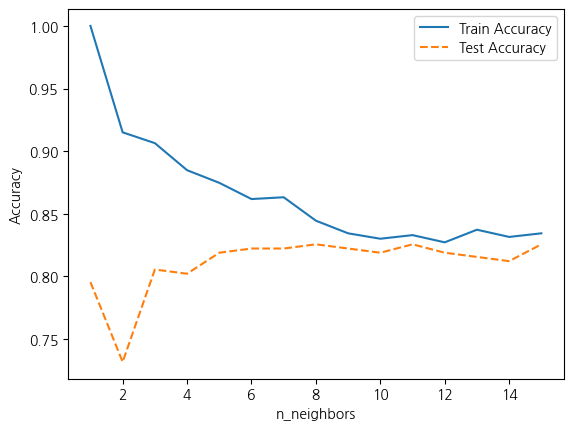

In [ ]:
# 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("n_neighbors")
plt.legend()

> n_neighbors : 8
- 이웃수가 8이하는 과적합이 될 수 있는 위험성이 있기에 과적합이 일어나지 않을 최적 파라미터는 8이라고 판단함

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 2
# 가중치(uniform, distance)
para_weights = (["uniform"]) * 10 + (["distance"] * 10)
# zip( list1, list2, …)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop: n_neighbors = para_n_neihtbors[0], weights = para_weights[0]
# 2번 loop: n_neighbors = para_n_neihtbors[1], weights = para_weights[1]

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy

df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.795
1,2,uniform,0.915,0.732
2,3,uniform,0.906,0.805
3,4,uniform,0.885,0.802
4,5,uniform,0.875,0.819
5,6,uniform,0.862,0.822
6,7,uniform,0.863,0.822
7,8,uniform,0.844,0.826
8,9,uniform,0.834,0.822
9,10,uniform,0.830,0.819


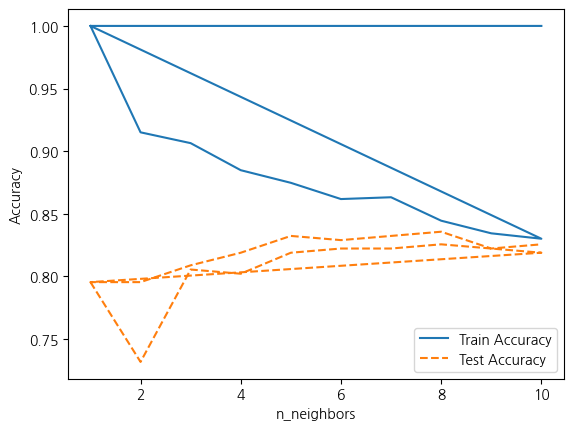

In [ ]:
# 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("n_neighbors")
plt.legend()

- uniform

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 2
# 가중치(uniform, distance)
para_weights = (["uniform"]) * 10 + (["distance"] * 10)
# zip( list1, list2, …)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop: n_neighbors = para_n_neihtbors[0], weights = para_weights[0]
# 2번 loop: n_neighbors = para_n_neihtbors[1], weights = para_weights[1]

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy

df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.795
1,2,uniform,0.915,0.732
2,3,uniform,0.906,0.805
3,4,uniform,0.885,0.802
4,5,uniform,0.875,0.819
5,6,uniform,0.862,0.822
6,7,uniform,0.863,0.822
7,8,uniform,0.844,0.826
8,9,uniform,0.834,0.822
9,10,uniform,0.830,0.819


In [ ]:
# 결과 확인을 위한 데이터 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors", columns = "Weights",
                                                      values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.795302  0.795302
2                   1.0  0.914986     0.795302  0.731544
3                   1.0  0.906340     0.808725  0.805369
4                   1.0  0.884726     0.818792  0.802013
5                   1.0  0.874640     0.832215  0.818792
6                   1.0  0.861671     0.828859  0.822148
7                   1.0  0.863112     0.832215  0.822148
8                   1.0  0.844380     0.835570  0.825503
9                   1.0  0.834294     0.822148  0.822148
10                  1.0  0.829971     0.825503  0.818792

In [ ]:
# pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)

df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head(10)

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.795302,0.795302
2,1.0,0.914986,0.795302,0.731544
3,1.0,0.906340,0.808725,0.805369
4,1.0,0.884726,0.818792,0.802013
5,1.0,0.874640,0.832215,0.818792
6,1.0,0.861671,0.828859,0.822148
7,1.0,0.863112,0.832215,0.822148
8,1.0,0.844380,0.835570,0.825503
9,1.0,0.834294,0.822148,0.822148


> 해석
- 이웃수 파라미터는 처음 정했기 때문에 그 정한 값으로 dfstance와 uniform을 기준으로 accuracy에 대한 비교를 보여주고 있다

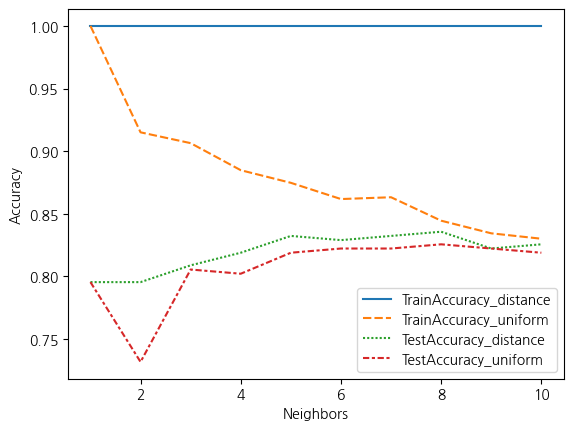

In [ ]:
# 정확도 그래프 확인
sns.lineplot(data = df_accuracy_weights_pivot)
plt.ylabel("Accuracy");

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 2
# 거리 계산 방법 (euclidean, manhattan)
para_metric = ["euclidean"] * 10 + ["manhattan"] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors,
                               metric = v_metric, weights = "uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,euclidean,1.000,0.795
1,2,euclidean,0.915,0.732
2,3,euclidean,0.906,0.805
3,4,euclidean,0.885,0.802
4,5,euclidean,0.875,0.819
5,6,euclidean,0.862,0.822
6,7,euclidean,0.863,0.822
7,8,euclidean,0.844,0.826
8,9,euclidean,0.834,0.822
9,10,euclidean,0.830,0.819


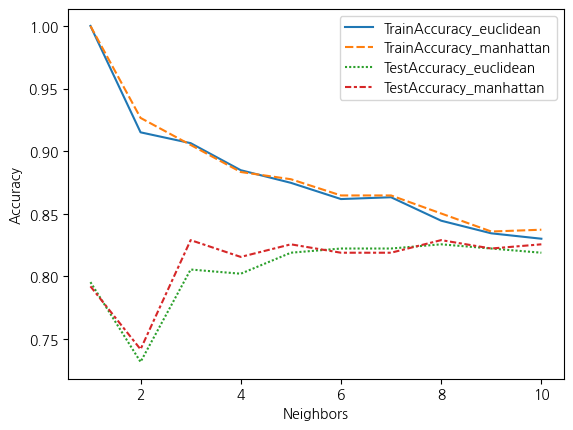

In [ ]:
# 결과 확인을 위한 데이터 변환
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns = "Metric",
                                                    values = ["TrainAccuracy", "TestAccuracy"])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
# 정확도 그래프 확인
sns.lineplot(data = df_accuracy_metric_pivot)
plt.ylabel("Accuracy");

In [ ]:
# 최종 모델
knn_model = KNeighborsClassifier(n_neighbors = 8, weights = "uniform", metric = "manhattan")
knn_model.fit(df_train_x, df_train_y)
y_pred = knn_model.predict(df_test_x)
# train 데이터 정확도
print("Train Accuracy: {0:.3f}".format(knn_model.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Test Accuracy: {0:.3f}\n".format(knn_model.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits=3))

Train Accuracy: 0.850
Test Accuracy: 0.829

Test Confusion matrix: 
[[ 55  39]
 [ 12 192]]
              precision    recall  f1-score   support

           0      0.821     0.585     0.683        94
           1      0.831     0.941     0.883       204

    accuracy                          0.829       298
   macro avg      0.826     0.763     0.783       298
weighted avg      0.828     0.829     0.820       298



> 해석
- 전체적인 accuracy를 올리기 보단 train과 test에서 과적합의 위험성을 낮추어 좀 더 신뢰성있는 모델을 만들기 위해 test를 올리고 train을 약간 낮추어 안정성을 확보하였다

# 모델평가

In [ ]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# 모델 성능 평가: Precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

# Check the Frequency of Variable
from collections import Counter

> 해석
- 로지스틱, 의사결정나무, 랜덤포레스트, 그래디언트 부스팅, SVM, KNN의 모델을 모두 돌려보았을 때 성능면에서 상위 4개 모델을 선정하여 모델을 나열하여 비교하면서 평가를 하는 것으로 선택

In [ ]:
# 분석 모델 리스트
model = ["DecisionTree", "RandomForest", "GradientBoosting", "KNN"]

# 정확도 저장
train_accuracy = []; test_accuracy = []
# auc score 저장
model_auc = []

# Precision, Recall score 저장
model_precision = []; model_recall = []
# f1 score 저장
model_f1_score = []

In [ ]:
model

['DecisionTree', 'RandomForest', 'GradientBoosting', 'KNN']

In [ ]:
# 최종모델
# dt_final = DecisionTreeClassifier(max_depth=7, min_samples_split=50, min_samples_leaf=14, random_state=1234)
dt_final = DecisionTreeClassifier(max_depth=2, min_samples_split=60, min_samples_leaf=18)

dt_final.fit(df_train_x, df_train_y)

# 정확도
train_accuracy.append(dt_final.score(df_train_x, df_train_y))
test_accuracy.append(dt_final.score(df_test_x, df_test_y))

# 예측값
y_prob_1 = dt_final.predict_proba(df_test_x)[:, 1]  # 1 발생 확률
y_pred = dt_final.predict(df_test_x)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[ 68  26]
 [  0 204]]
              precision    recall  f1-score   support

           0      1.000     0.723     0.840        94
           1      0.887     1.000     0.940       204

    accuracy                          0.913       298
   macro avg      0.943     0.862     0.890       298
weighted avg      0.923     0.913     0.908       298



In [ ]:
print("P(y=1) 확률...", y_prob_1)
print()
print("1/0-판정...",y_pred)

P(y=1) 확률... [0.        0.9039548 0.9039548 0.9039548 0.        0.9039548 0.9039548
 0.9039548 0.9039548 0.9039548 0.9039548 0.9039548 0.9039548 0.9039548
 0.9039548 0.9039548 0.9039548 0.9039548 0.        0.9039548 0.9039548
 0.        0.9039548 0.9039548 0.        0.9039548 0.9039548 0.9039548
 0.9039548 0.9039548 0.9039548 0.9039548 0.9039548 0.9039548 0.
 0.        0.9039548 0.9039548 0.9039548 0.9039548 0.        0.9039548
 0.9039548 0.9039548 0.        0.9039548 0.9039548 0.9039548 0.
 0.        0.9039548 0.        0.9039548 0.        0.9039548 0.9039548
 0.        0.9039548 0.9039548 0.9039548 0.9039548 0.9039548 0.
 0.9039548 0.9039548 0.        0.9039548 0.        0.9039548 0.9039548
 0.9039548 0.9039548 0.9039548 0.        0.9039548 0.9039548 0.9039548
 0.        0.        0.9039548 0.        0.9039548 0.9039548 0.9039548
 0.9039548 0.9039548 0.9039548 0.        0.9039548 0.9039548 0.9039548
 0.9039548 0.9039548 0.9039548 0.9039548 0.        0.        0.
 0.9039548 0.9039548 

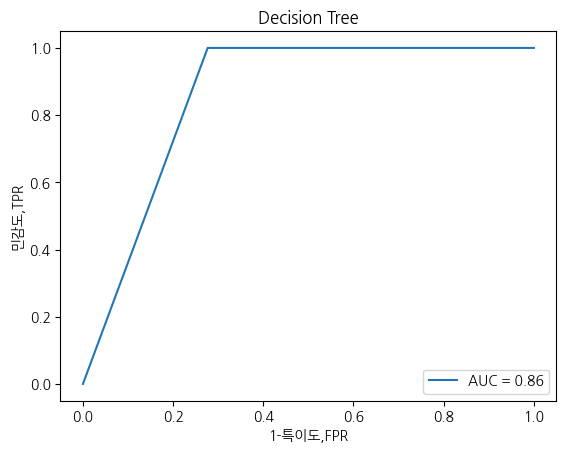

In [ ]:
plt.title("Decision Tree")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR")
plt.show()

> 해석
- 각 모델의 precision, recall, f1 score 값 추가

In [ ]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.9400921658986175]

In [ ]:
# 최종 모델
rf_final = RandomForestClassifier(min_samples_leaf=15, max_depth=7, n_estimators=115)
rf_final.fit(df_train_x, df_train_y)

# 정확도
train_accuracy.append(rf_final.score(df_train_x, df_train_y))
test_accuracy.append(rf_final.score(df_test_x, df_test_y))

# 예측값
y_prob_1 = rf_final.predict_proba(df_test_x)[:, 1]  # 1 발생 확률
y_pred = rf_final.predict(df_test_x)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[ 66  28]
 [  2 202]]
              precision    recall  f1-score   support

           0      0.971     0.702     0.815        94
           1      0.878     0.990     0.931       204

    accuracy                          0.899       298
   macro avg      0.924     0.846     0.873       298
weighted avg      0.907     0.899     0.894       298



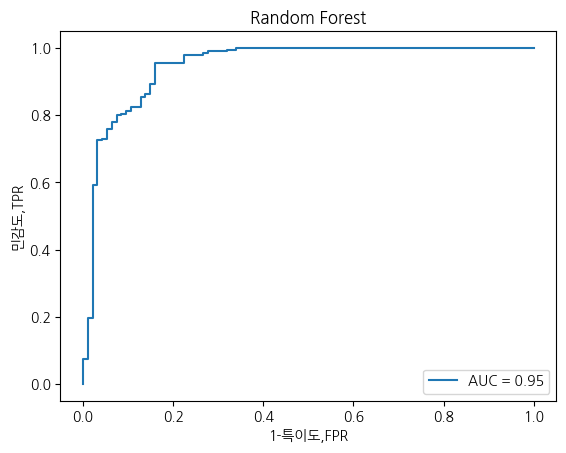

In [ ]:
plt.title("Random Forest")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR")
plt.show()

In [ ]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.9400921658986175, 0.9308755760368664]

In [ ]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf=15, max_depth=3, n_estimators=80,
			 learning_rate=0.04)
gb_final.fit(df_train_x, df_train_y)

# 정확도
train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

# 예측값
y_prob_1 = gb_final.predict_proba(df_test_x)[:, 1]  # 1 발생 확률
y_pred = gb_final.predict(df_test_x)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[ 83  11]
 [  0 204]] 

              precision    recall  f1-score   support

           0      1.000     0.883     0.938        94
           1      0.949     1.000     0.974       204

    accuracy                          0.963       298
   macro avg      0.974     0.941     0.956       298
weighted avg      0.965     0.963     0.962       298



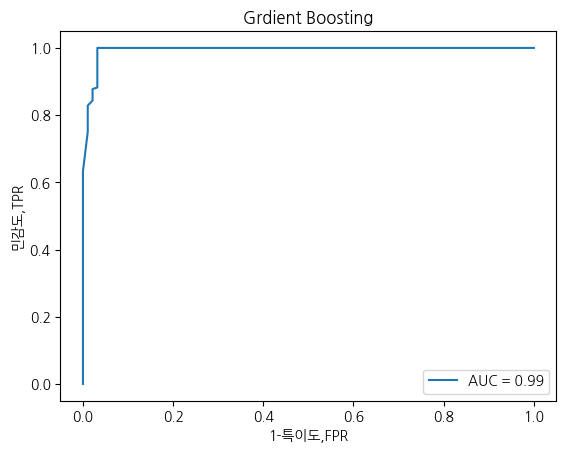

In [ ]:
plt.title("Grdient Boosting")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR")
plt.show()

In [ ]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.9400921658986175, 0.9308755760368664, 0.9737470167064439]

In [ ]:
# 최종 모델
knn_model = KNeighborsClassifier(n_neighbors = 5, weights = "uniform", metric = "euclidean")
knn_model.fit(df_train_x, df_train_y)

train_accuracy.append(knn_model.score(df_train_x, df_train_y))
test_accuracy.append(knn_model.score(df_test_x, df_test_y))

y_prob_1 = knn_model.predict_proba(df_test_x)[:, 1]  # 1 발생 확률
y_pred = knn_model.predict(df_test_x)  # 1/0 판정

# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits=3))
# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Test Confusion matrix: 
[[ 51  43]
 [ 11 193]]
              precision    recall  f1-score   support

           0      0.823     0.543     0.654        94
           1      0.818     0.946     0.877       204

    accuracy                          0.819       298
   macro avg      0.820     0.744     0.766       298
weighted avg      0.819     0.819     0.807       298



In [ ]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.9400921658986175,
 0.9308755760368664,
 0.9737470167064439,
 0.8772727272727273]

> 해석
- 모델별 모든 평가 지표 수치화

In [ ]:
# 모델별 평가 결과
df_eval = pd.DataFrame(index = model)
df_eval["TrainAccuracy"] = train_accuracy ; df_eval["TestAccuracy"] = test_accuracy
df_eval["AUC"] = model_auc

df_eval["Precision"] = model_precision; df_eval["Recall"] = model_recall
df_eval["F1Score"] = model_f1_score

df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
DecisionTree,0.927,0.913,0.862,0.887,1.000,0.940
RandomForest,0.928,0.899,0.948,0.878,0.990,0.931
GradientBoosting,0.977,0.963,0.994,0.949,1.000,0.974
KNN,0.875,0.819,0.834,0.818,0.946,0.877


> 해석
- 기본적으로 크게 봤을 때 tree모델들이 knn에 비해 높은 평가를 보여주고 있고 tree 모델에서 한tree모델만 가지는 의사결정이 제일 낮은 성능지표를 가지고 여러 개의 tree모델을 사용하여 학습하는 랜덤포레스트와 GB 모델이 높은 평가지표를 보여주고 있다

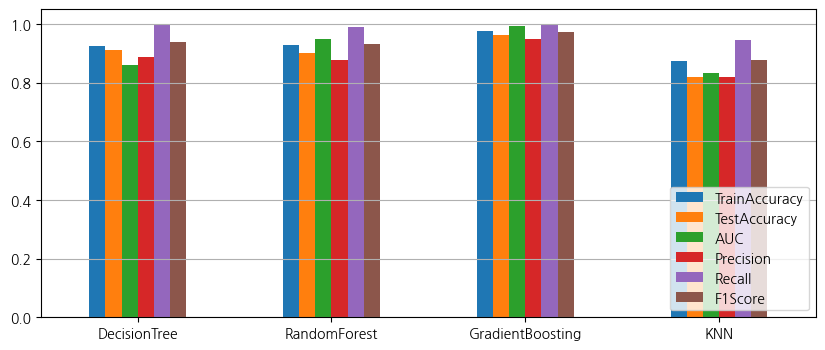

In [ ]:
# 모델별 평가 지표 확인
df_eval.plot.bar(rot = 0, figsize=(10,4))
plt.legend(loc="lower right")
plt.grid(axis = "y")